# Introduction
The purpose of this notebook is to explore different time series forecasting models to determine which has the best performance in predicting future popularity of baby names. The best model will be incorporated in the baby names app.

# Background
This information has been provided by https://www.geeksforgeeks.org/machine-learning/time-series-analysis-and-forecasting/.

## What is Time Series Forecasting?
Time Series Forecasting is a statistical technique used to predict future values of a time series based on past observations. In simpler terms, it's like looking into the future of data points plotted over time. By analyzing patterns and trends in historical data, Time Series Forecasting helps make informed predictions about what may happen next, assisting in decision-making and planning for the future.

## Different Time Series Forecasting Algorithms
1. Autoregressive (AR) Model: Autoregressive (AR) model is a type of time series model that predicts future values based on linear combinations of past values of the same time series. In an AR(p) model, the current value of the time series is modeled as a linear function of its previous p values, plus a random error term. The order of the autoregressive model (p) determines how many past values are used in the prediction.
2. Autoregressive Integrated Moving Average (ARIMA): ARIMA is a widely used statistical method for time series forecasting. It models the next value in a time series based on linear combination of its own past values and past forecast errors. The model parameters include the order of autoregression (p), differencing (d), and moving average (q).
3. ARIMAX: ARIMA model extended to include exogenous variables that can improve forecast accuracy.
4. Seasonal Autoregressive Integrated Moving Average (SARIMA): SARIMA extends ARIMA by incorporating seasonality into the model. It includes additional seasonal parameters (P, D, Q) to capture periodic fluctuations in the data.
5. SARIMAX: Extension of SARIMA that incorporates exogenous variables for seasonal time series forecasting.
6. Vector Autoregression (VAR) Models: VAR models extend autoregression to multivariate time series data by modeling each variable as a linear combination of its past values and the past values of other variables. They are suitable for analyzing and forecasting interdependencies among multiple time series.
7. Theta Method: A simple and intuitive forecasting technique based on extrapolation and trend fitting.
8. Exponential Smoothing Methods: Exponential smoothing methods, such as Simple Exponential Smoothing (SES) and Holt-Winters, forecast future values by exponentially decreasing weights for past observations. These methods are particularly useful for data with trend and seasonality.
9. Gaussian Processes Regression: Gaussian Processes Regression is a Bayesian non-parametric approach that models the distribution of functions over time. It provides uncertainty estimates along with point forecasts, making it useful for capturing uncertainty in time series forecasting.
10. Generalized Additive Models (GAM): A flexible modeling approach that combines additive components, allowing for nonlinear relationships and interactions.
11. Random Forests: Random Forests is a machine learning ensemble method that constructs multiple decision trees during training and outputs the average prediction of the individual trees. It can handle complex relationships and interactions in the data, making it effective for time series forecasting.
12. Gradient Boosting Machines (GBM): GBM is another ensemble learning technique that builds multiple decision trees sequentially, where each tree corrects the errors of the previous one. It excels in capturing nonlinear relationships and is robust against overfitting.
13. State Space Models: State space models represent a time series as a combination of unobserved (hidden) states and observed measurements. These models capture both the deterministic and stochastic components of the time series, making them suitable for forecasting and anomaly detection.
14. Dynamic Linear Models (DLMs): DLMs are Bayesian state-space models that represent time series data as a combination of latent state variables and observations. They are flexible models capable of incorporating various trends, seasonality, and other dynamic patterns in the data.
15. Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) Networks: RNNs and LSTMs are deep learning architectures designed to handle sequential data. They can capture complex temporal dependencies in time series data, making them powerful tools for forecasting tasks, especially when dealing with large-scale and high-dimensional data.
16. Hidden Markov Model (HMM): A Hidden Markov Model (HMM) is a statistical model used to describe sequences of observable events generated by underlying hidden states. In time series, HMMs infer hidden states from observed data, capturing dependencies and transitions between states. They are valuable for tasks like speech recognition, gesture analysis, and anomaly detection, providing a framework to model complex sequential data and extract meaningful patterns from it.

# Data Prep

In [1]:
# Set random seeds for reproducibility
import random
import numpy as np

# Set seeds for all random number generators
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

print(f"Random seed set to {RANDOM_SEED} for reproducibility")


Random seed set to 42 for reproducibility


In [2]:
# import necessary libraries
import sqlite3
import pandas as pd

Connect to the SQLite database and pull in all of the data from the names table.

In [3]:
conn = sqlite3.connect('data/names.db')
names = pd.read_sql_query("SELECT * FROM names", conn)
conn.close()

Convert year to a datetime and set as the index

In [4]:
names['year'] = pd.to_datetime(names['year'], format='%Y')
names.set_index('year', inplace=True)
names.head()

name sex  total_count  popularity_percent  popularity_rank
year                                                                      
2024-01-01      Liam   M        22164            0.012921                1
2024-01-01      Noah   M        20337            0.011856                2
2024-01-01    Oliver   M        15343            0.008945                3
2024-01-01  Theodore   M        12011            0.007002                4
2024-01-01     James   M        11793            0.006875                5

# Exploratory Data Analysis / Feature Engineering


## Autocorrelation
Time to use autocorrelation to see how past years relate to current ones.

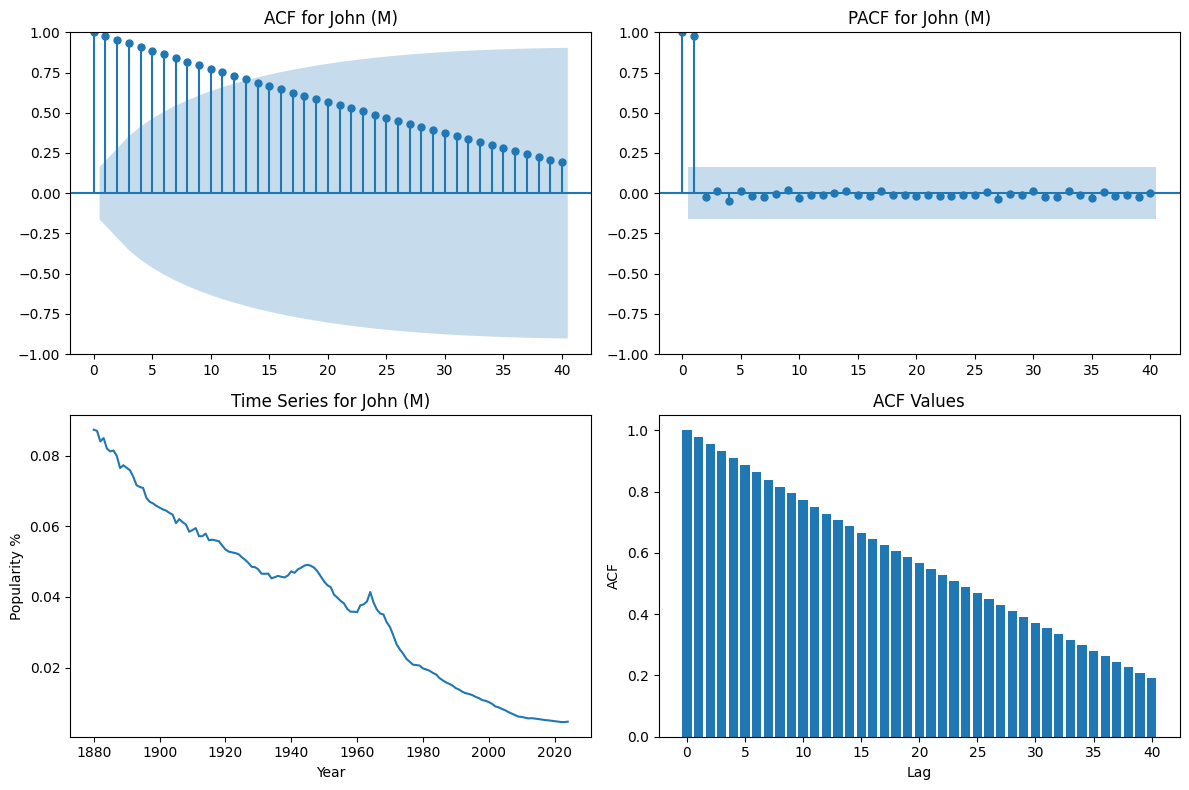

(array([1.        , 0.97740737, 0.95423707, 0.93207344, 0.90837599,
        0.88564311, 0.86286632, 0.83933796, 0.81628834, 0.79483373,
        0.77252784, 0.75036924, 0.72831947, 0.70676422, 0.68638311,
        0.66598392, 0.64524863, 0.62569379, 0.60634828, 0.58693623,
        0.56738595, 0.54773309, 0.52790773, 0.50782302, 0.48789287,
        0.46799086, 0.4491254 , 0.429349  , 0.40989914, 0.39057389,
        0.3723862 , 0.35378765, 0.33456071, 0.3165614 , 0.29847772,
        0.27977819, 0.26213637, 0.24428747, 0.22638636, 0.20837822,
        0.19102558]),
 array([ 1.        ,  0.98419492, -0.03369224,  0.01754989, -0.06695611,
         0.01859769, -0.02256976, -0.03695016, -0.00380852,  0.03639181,
        -0.0455829 , -0.01056577, -0.02067556,  0.006395  ,  0.0189725 ,
        -0.02052061, -0.0272687 ,  0.02399872, -0.01388378, -0.01758733,
        -0.03033491, -0.01770818, -0.0237963 , -0.03422201, -0.01600281,
        -0.01562682,  0.01953801, -0.06018898, -0.00704399, -0.024230

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# For a specific name
def analyze_name_autocorrelation(name, sex, lags=40):
    # Filter data for specific name and sex
    name_data = names[(names['name'] == name) & (names['sex'] == sex)].copy()
    name_data = name_data.sort_values('year')
    
    # Calculate autocorrelation
    acf_values = acf(name_data['popularity_percent'], nlags=lags, fft=True)
    pacf_values = pacf(name_data['popularity_percent'], nlags=lags)
    
    # Plot results
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # ACF plot
    plot_acf(name_data['popularity_percent'], lags=lags, ax=axes[0,0])
    axes[0,0].set_title(f'ACF for {name} ({sex})')
    
    # PACF plot
    plot_pacf(name_data['popularity_percent'], lags=lags, ax=axes[0,1])
    axes[0,1].set_title(f'PACF for {name} ({sex})')
    
    # Time series plot
    axes[1,0].plot(name_data.index, name_data['popularity_percent'])
    axes[1,0].set_title(f'Time Series for {name} ({sex})')
    axes[1,0].set_xlabel('Year')
    axes[1,0].set_ylabel('Popularity %')
    
    # Autocorrelation values
    axes[1,1].bar(range(len(acf_values)), acf_values)
    axes[1,1].set_title('ACF Values')
    axes[1,1].set_xlabel('Lag')
    axes[1,1].set_ylabel('ACF')
    
    plt.tight_layout()
    plt.show()
    
    return acf_values, pacf_values

analyze_name_autocorrelation('John', 'M')


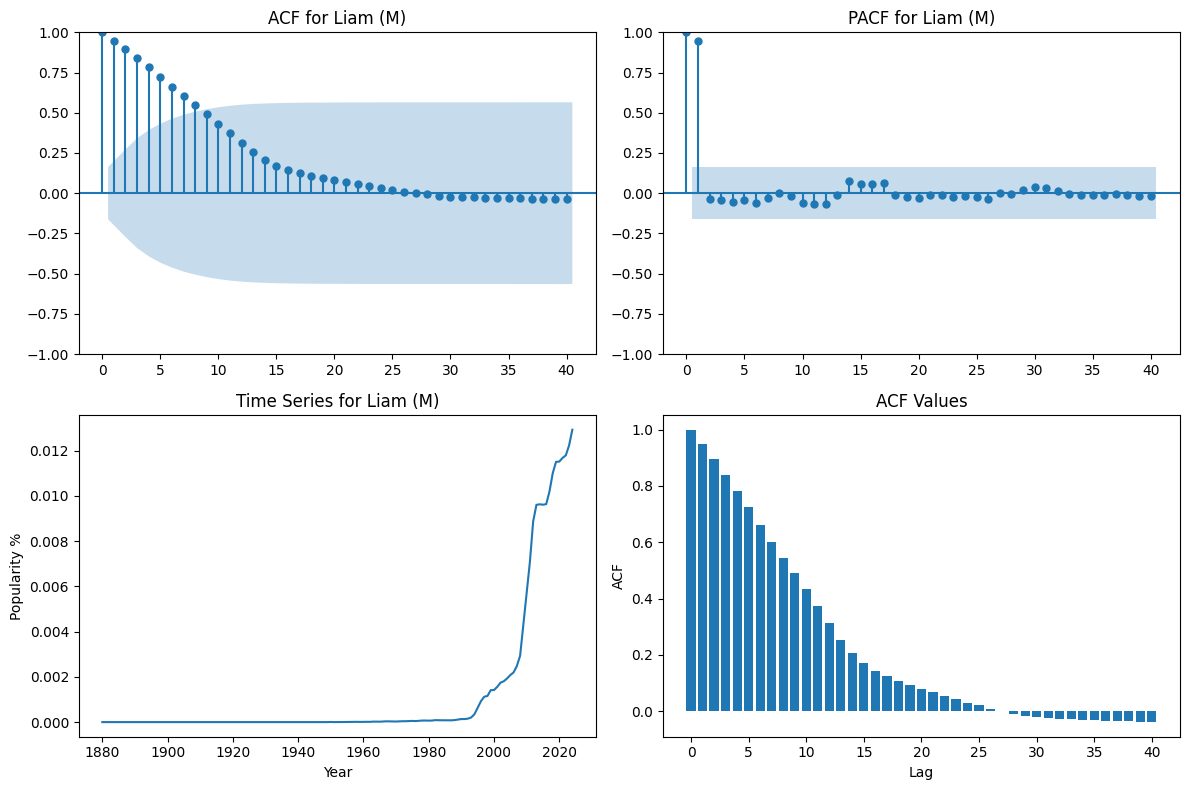

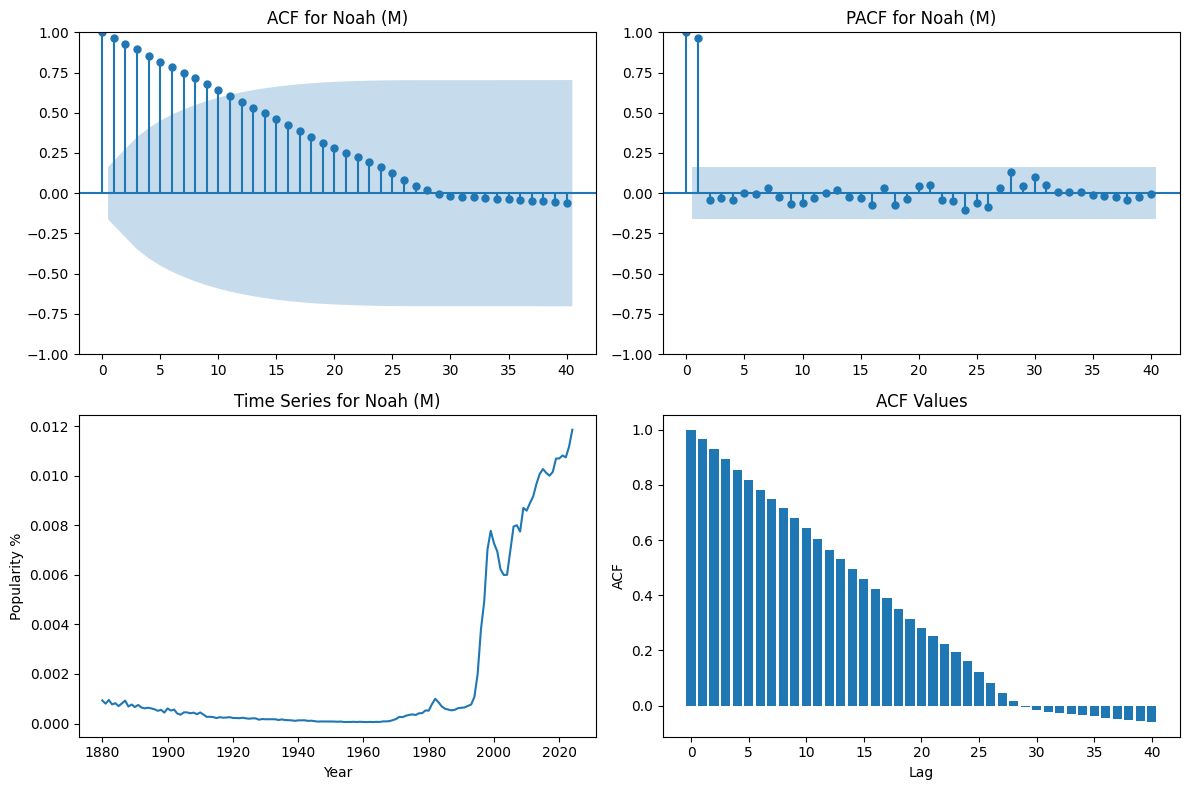

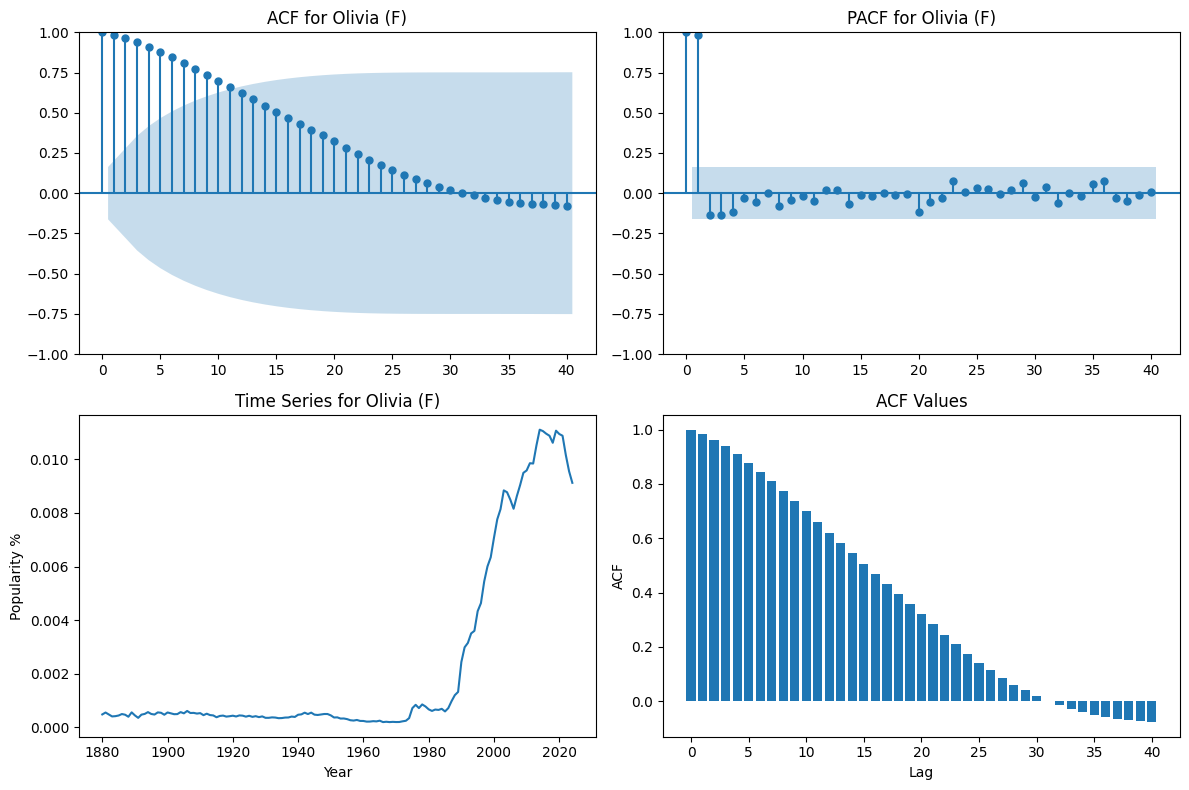

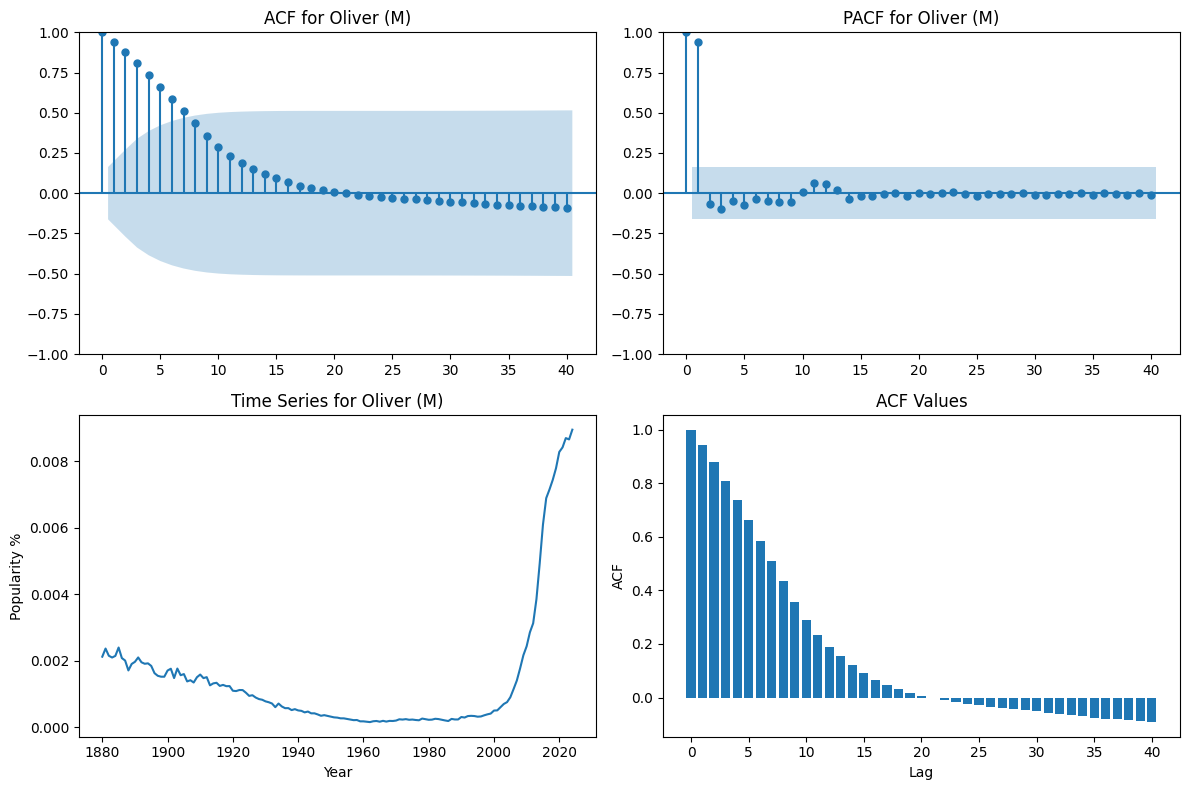

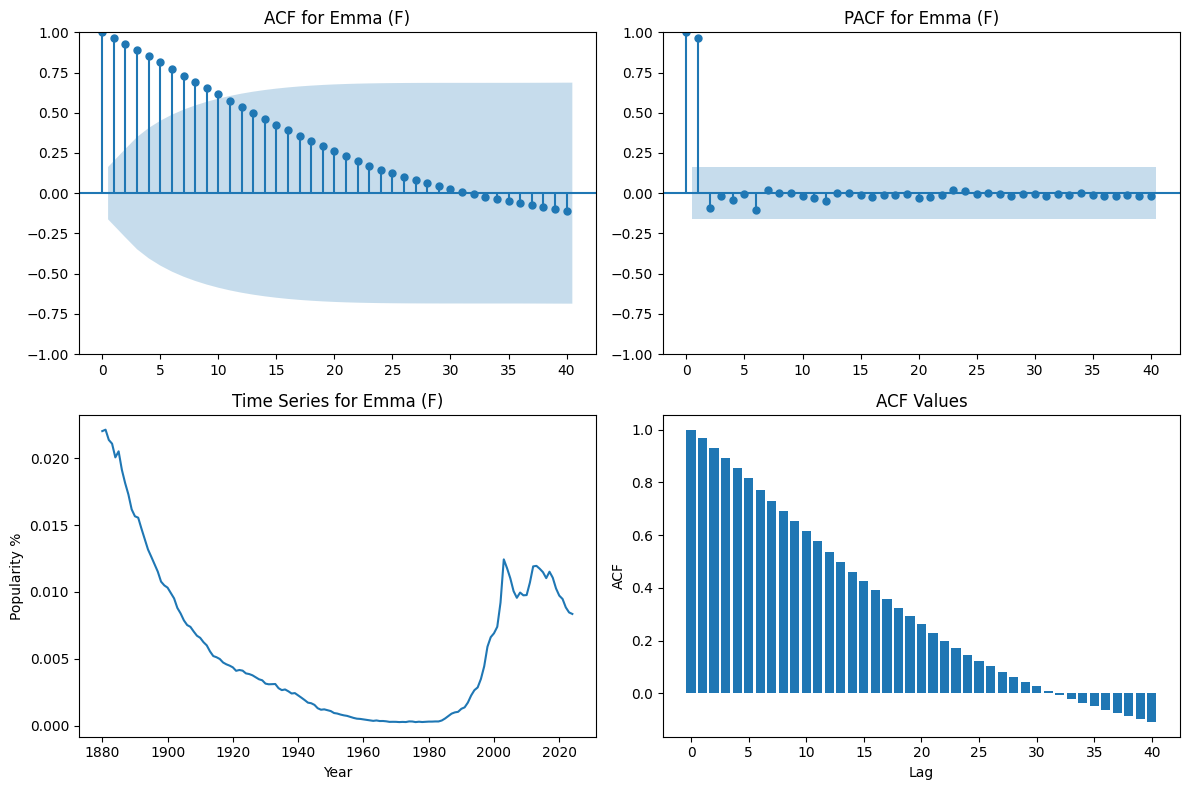

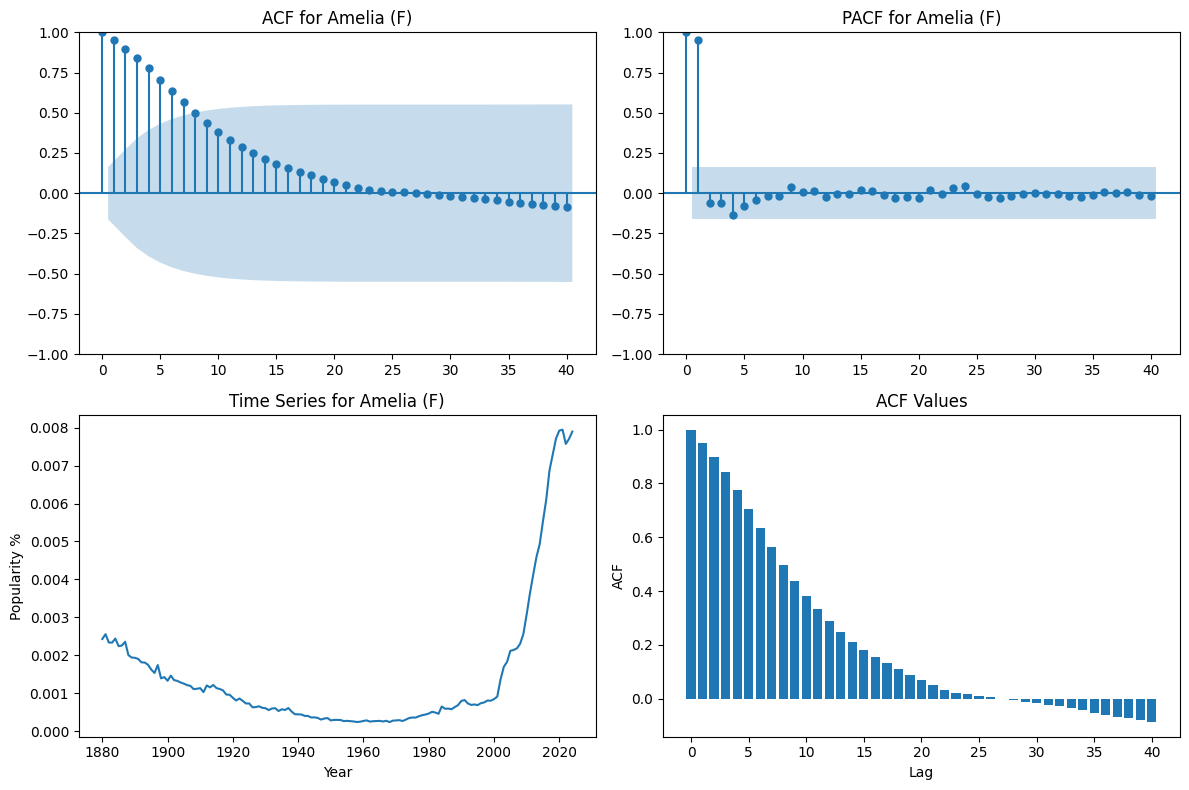

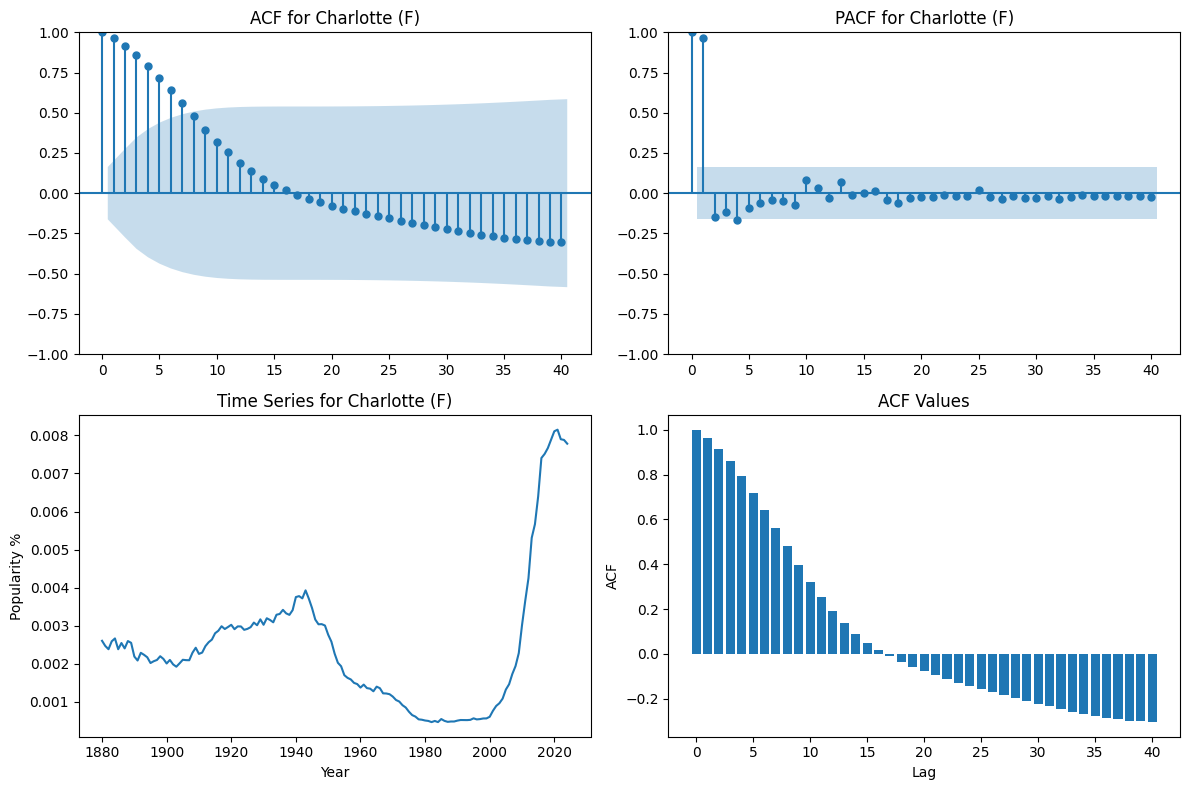

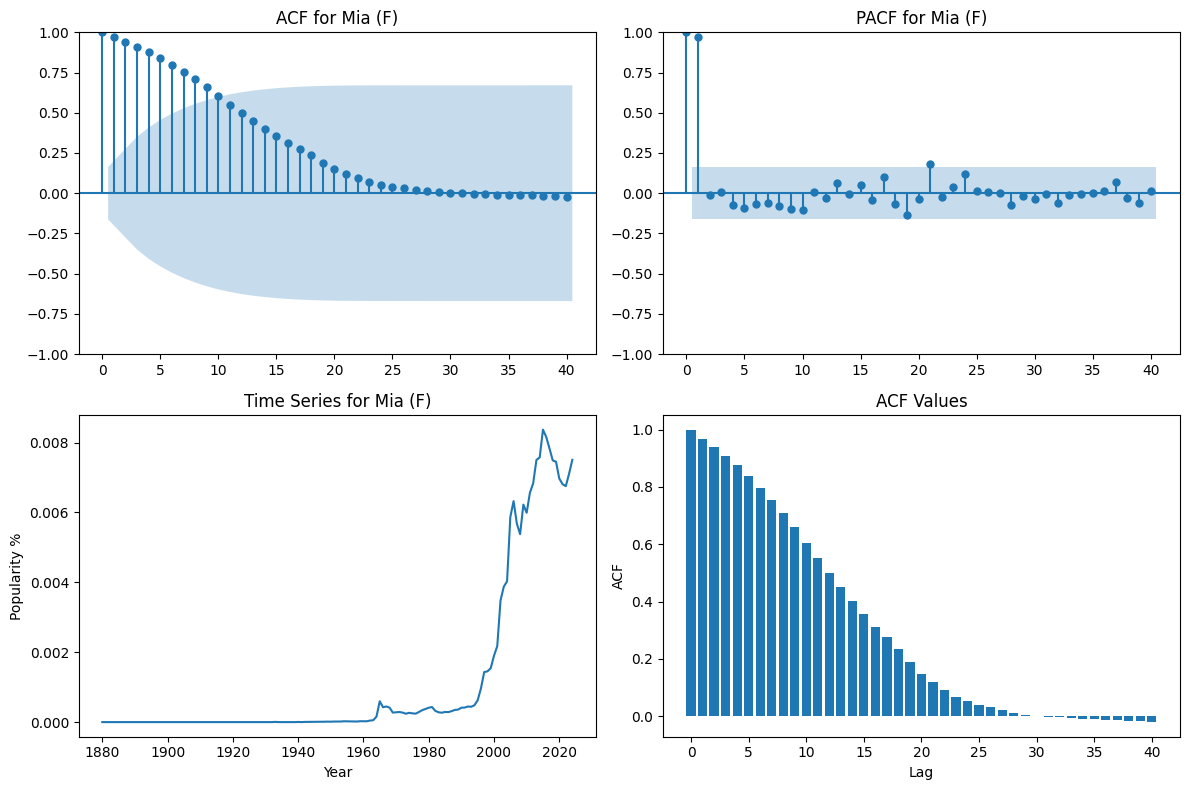

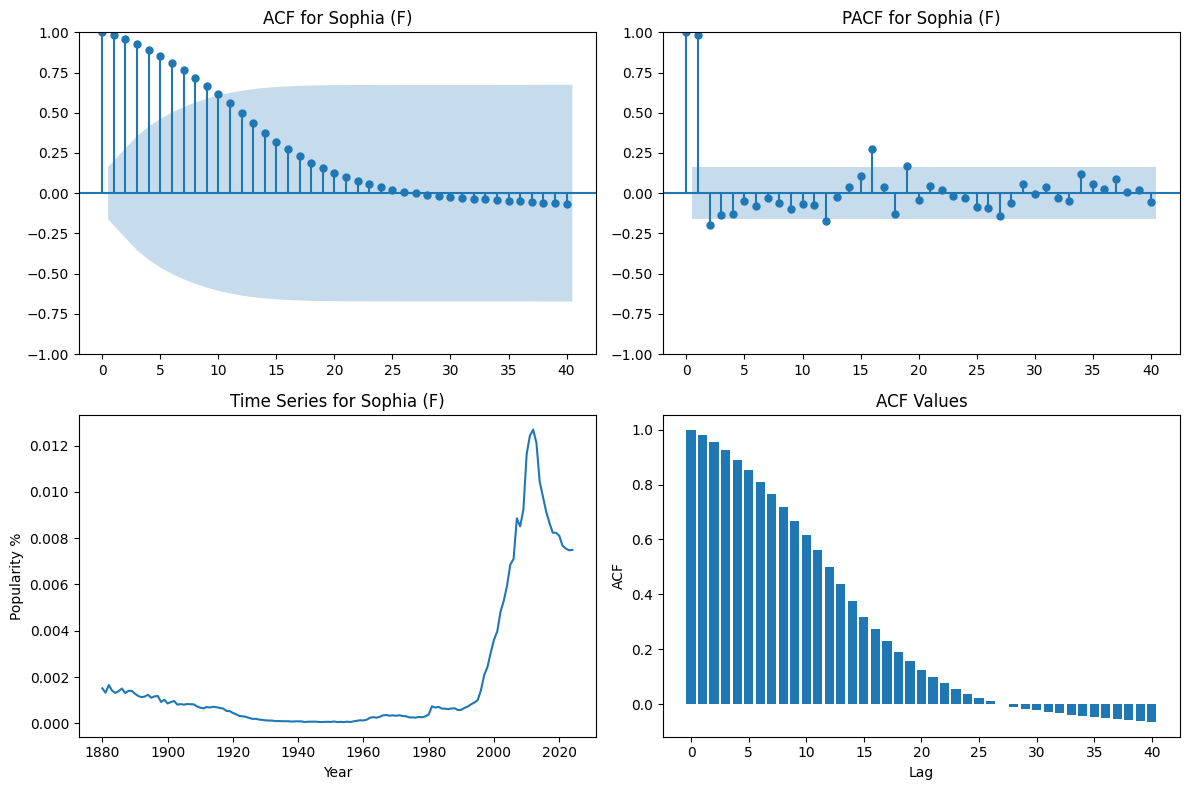

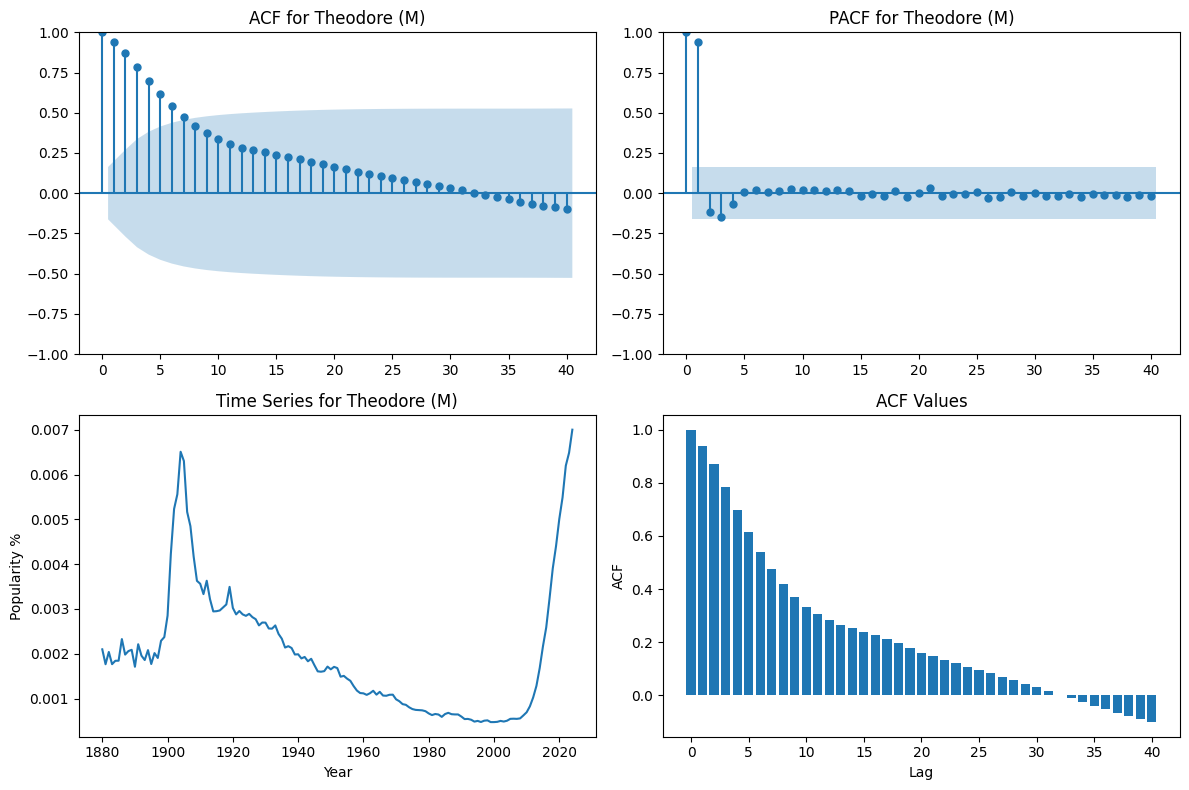

In [6]:
# Run the function for the top 10 names M and F for 2024
top_names = names.loc[["2024"]].sort_values(by='popularity_percent', ascending=False).head(10)

for index, row in top_names.iterrows():
    analyze_name_autocorrelation(row['name'], row['sex'])

It appears that only the previous year's popularity has a strong correlation with the current year's popularity. Let's look at this again but with 10 random names instead of the top 10 most popular names and see if the same observation persists.

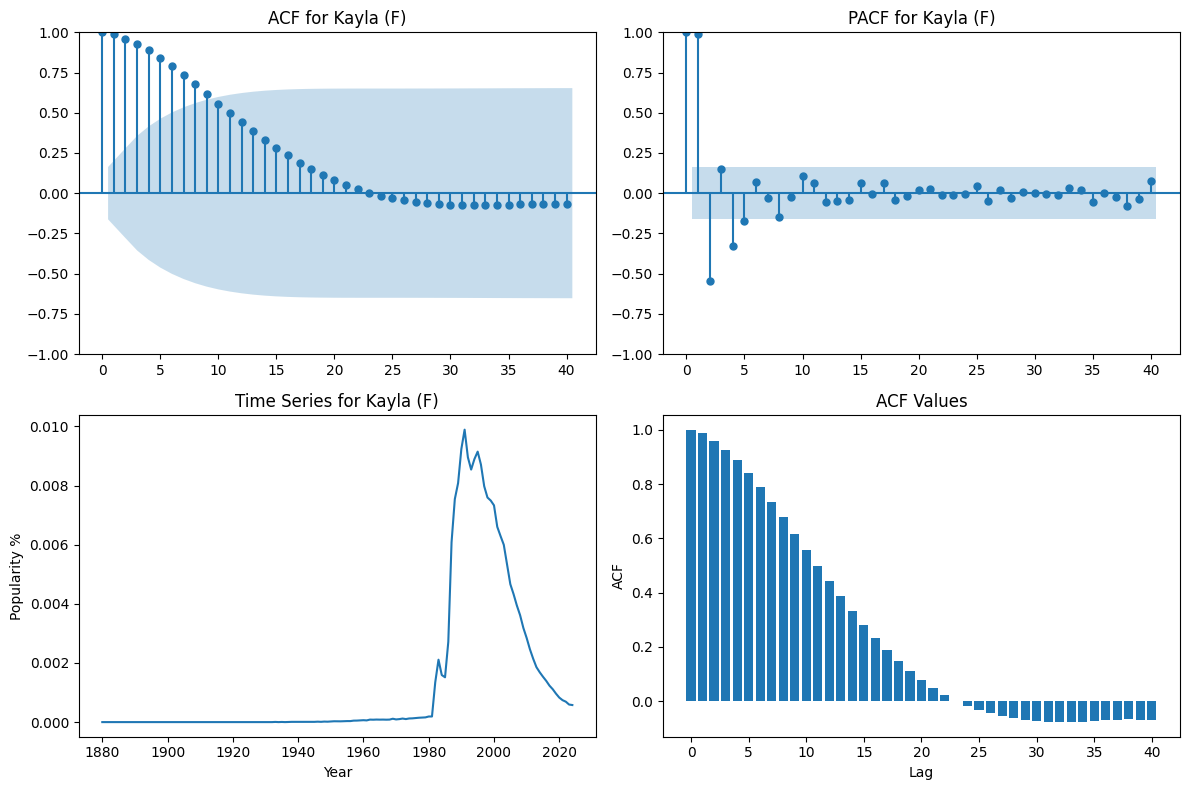

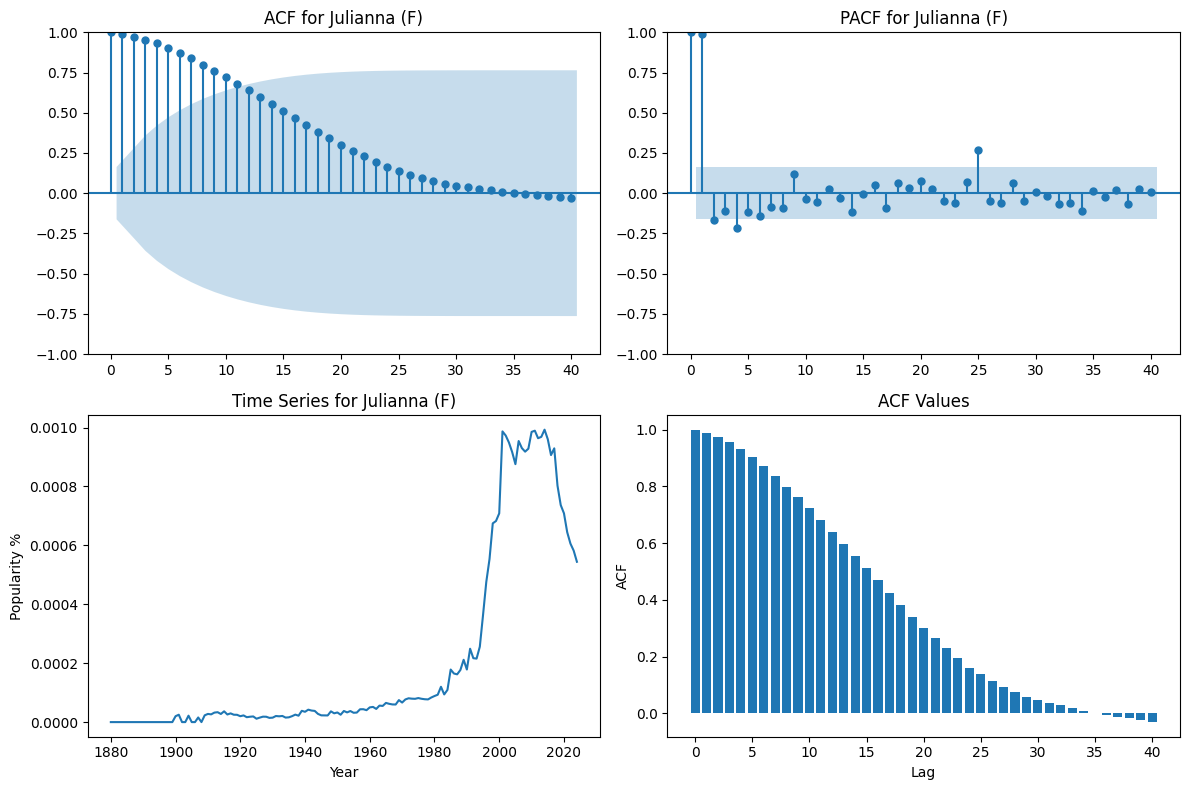

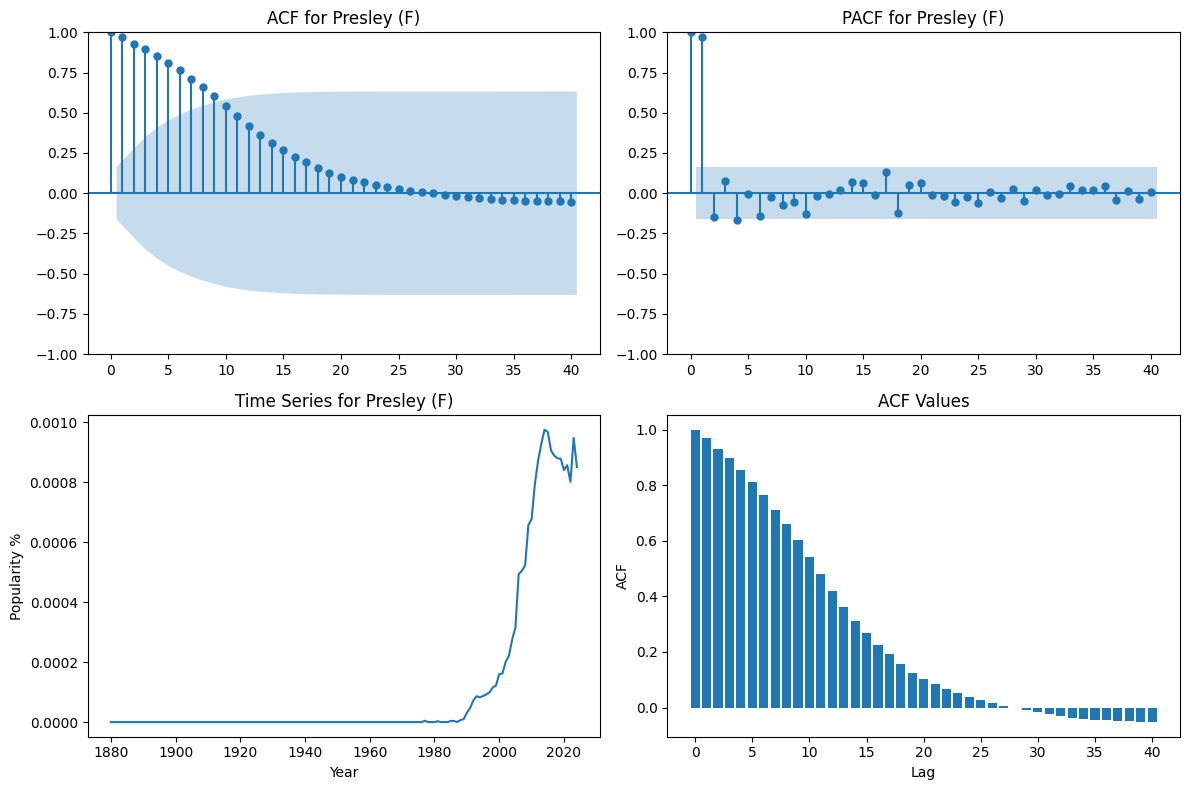

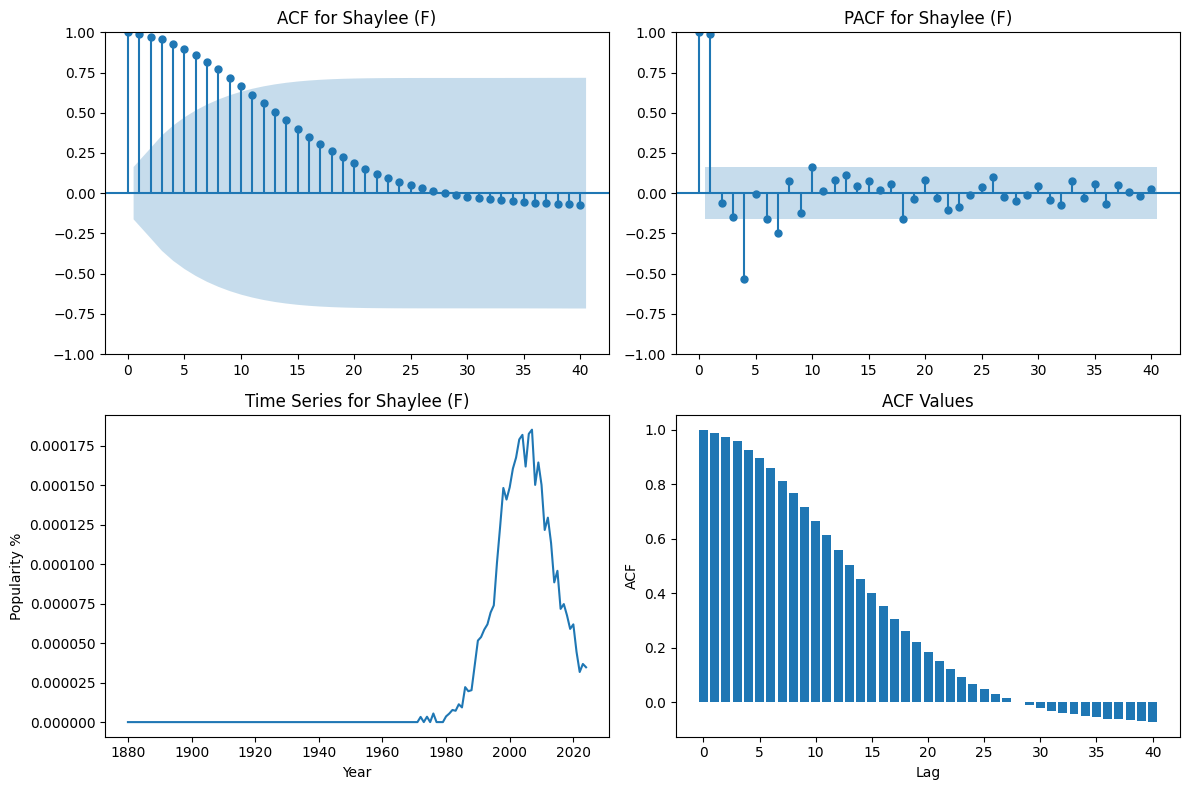

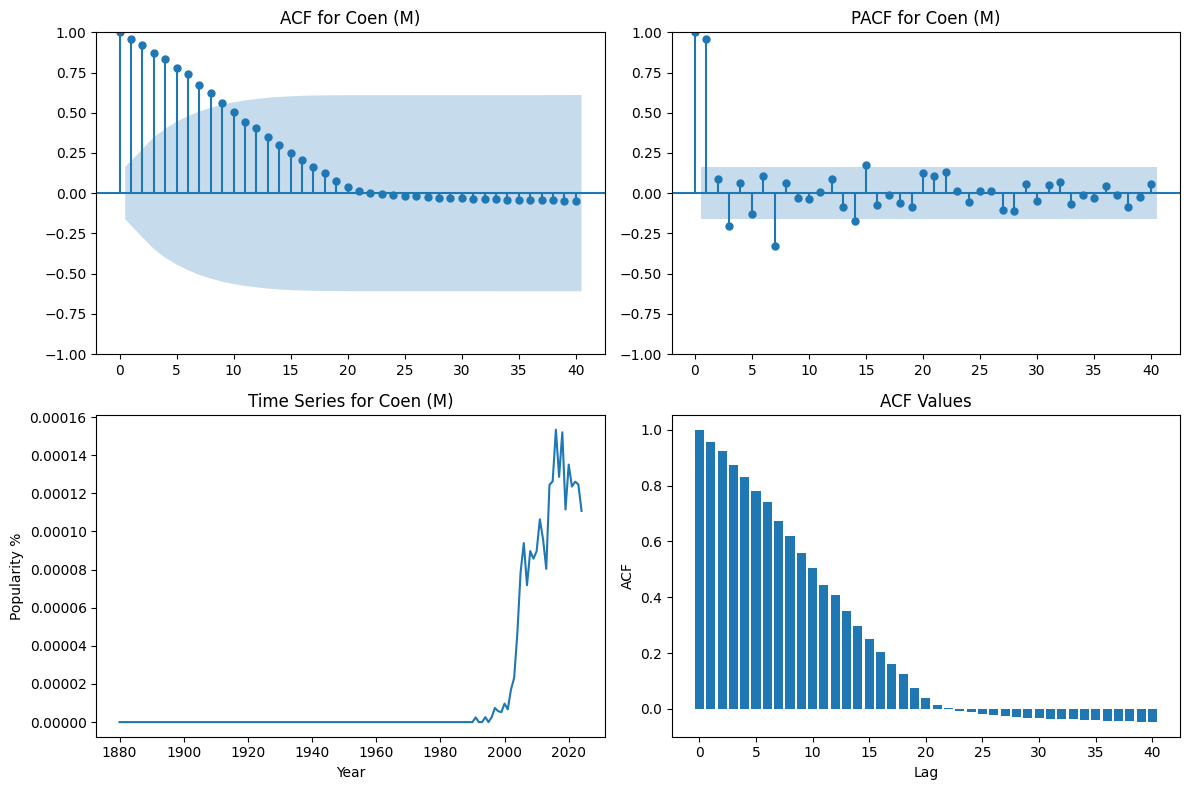

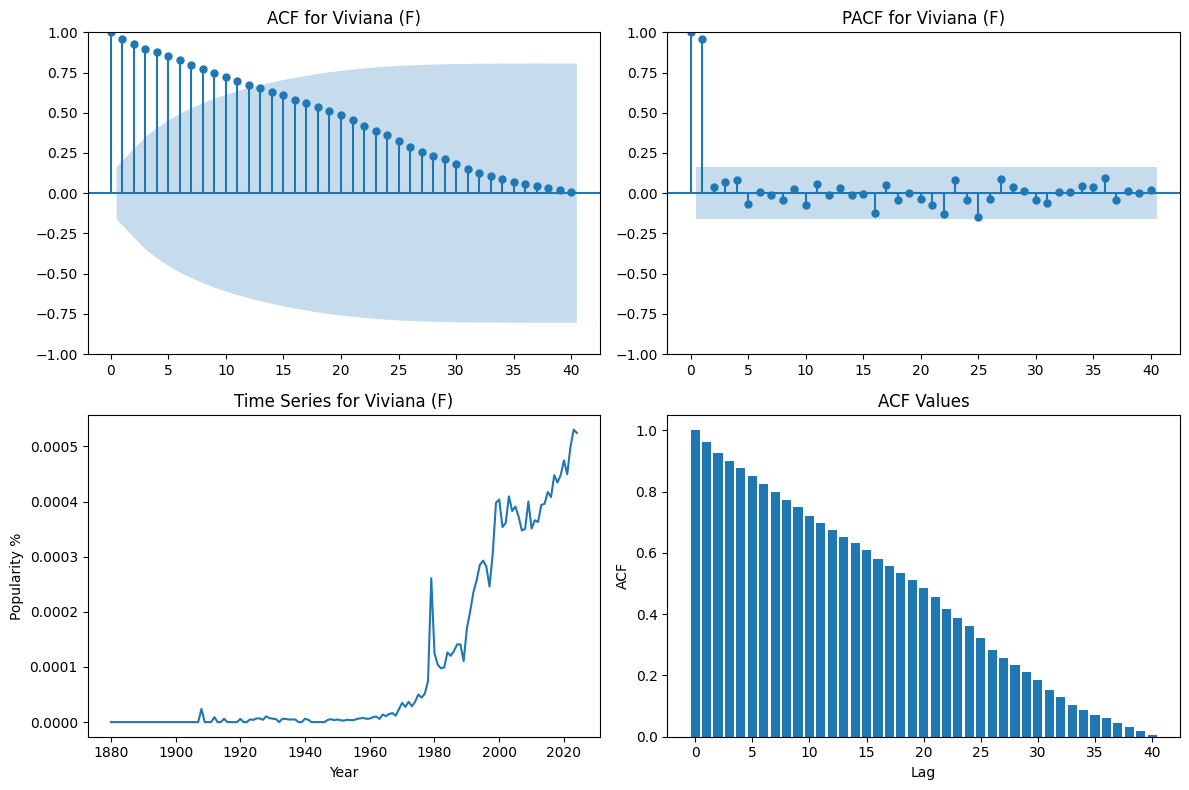

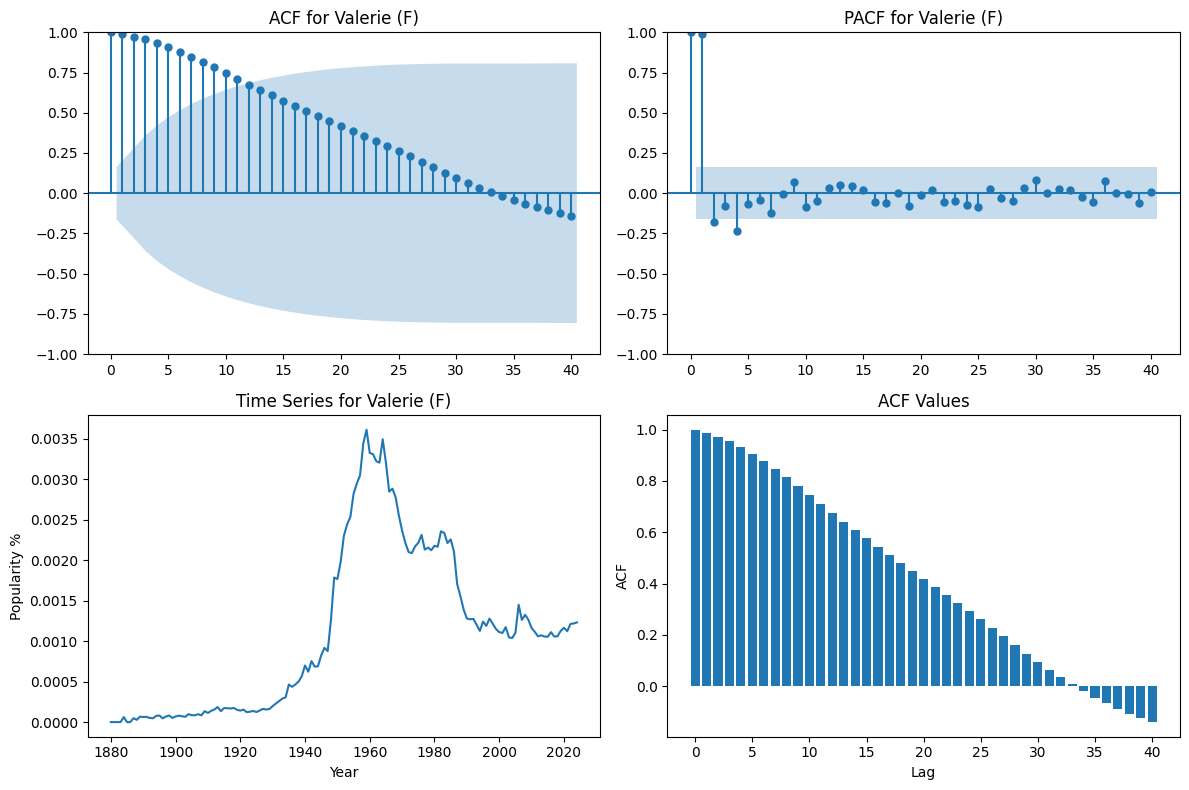

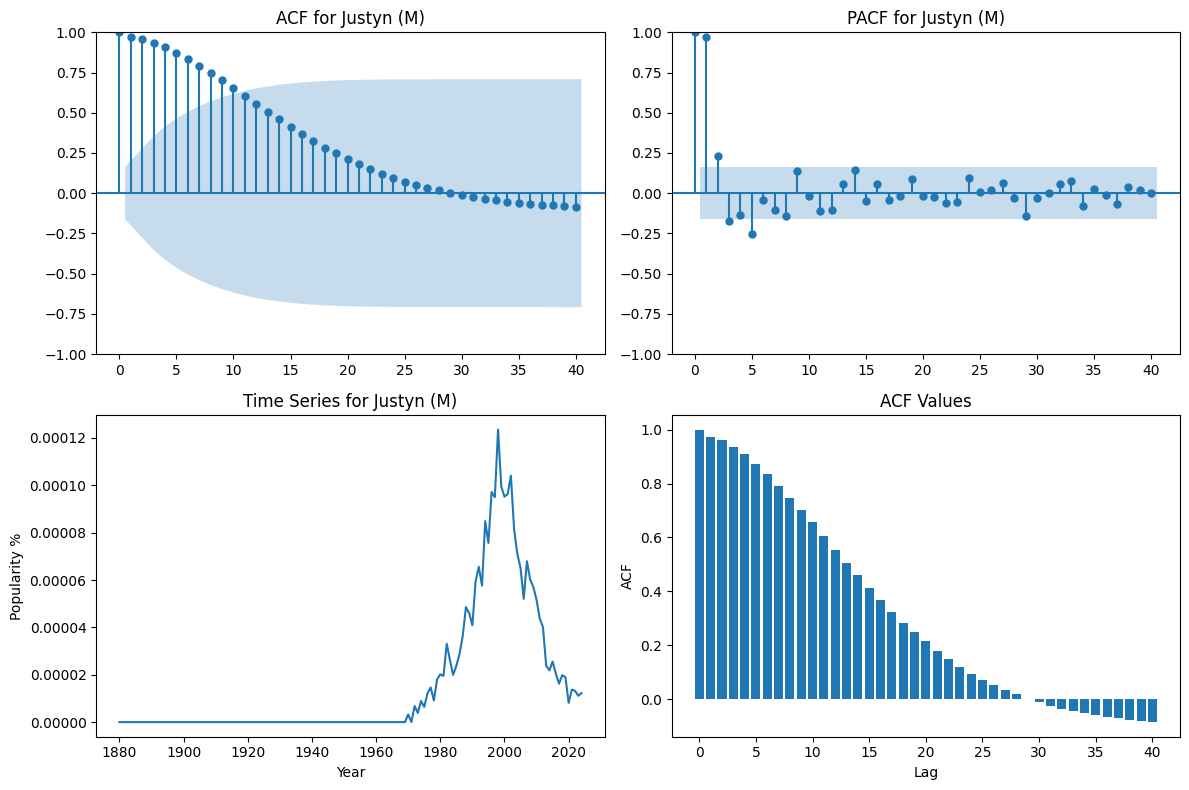

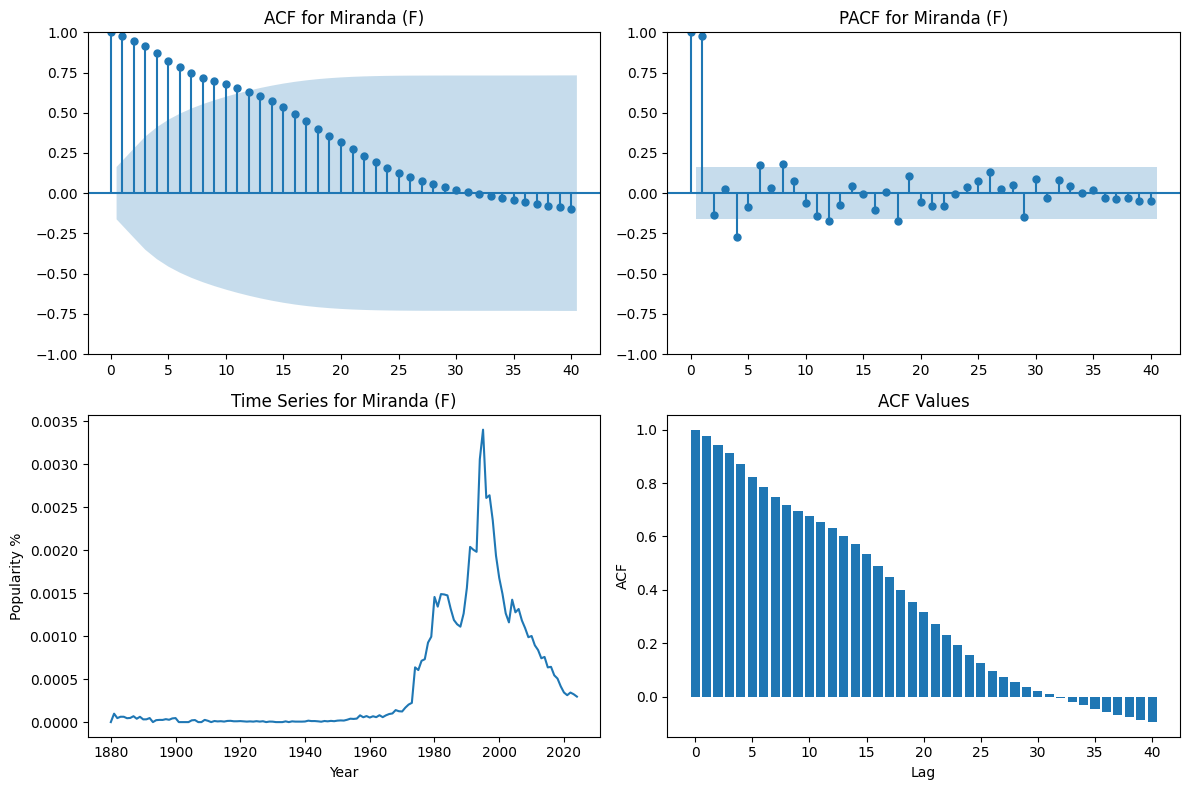

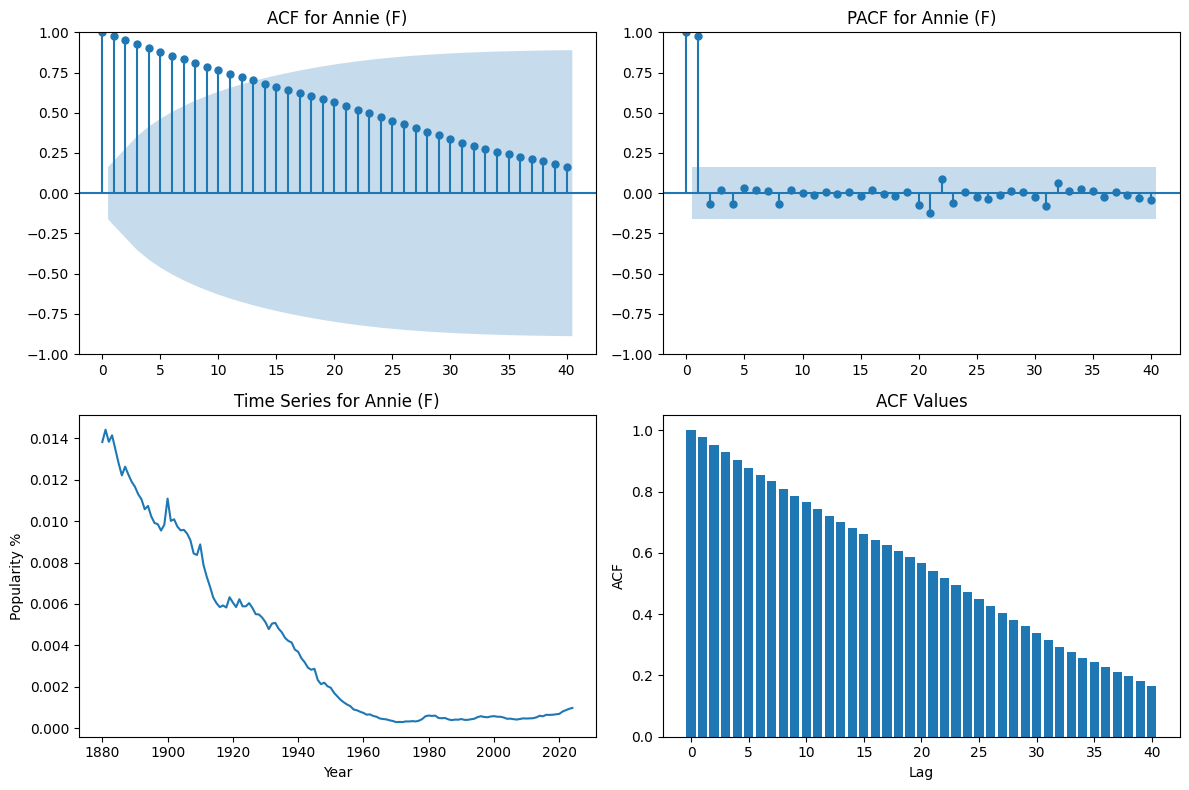

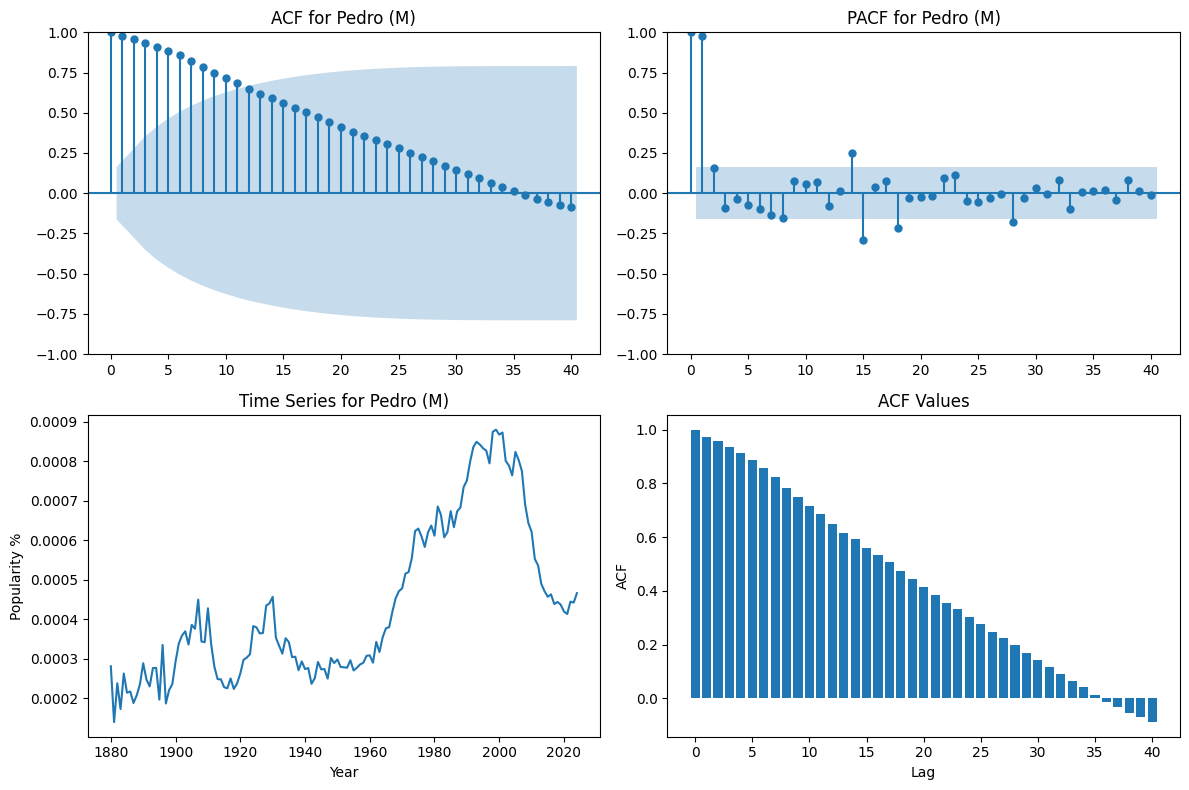

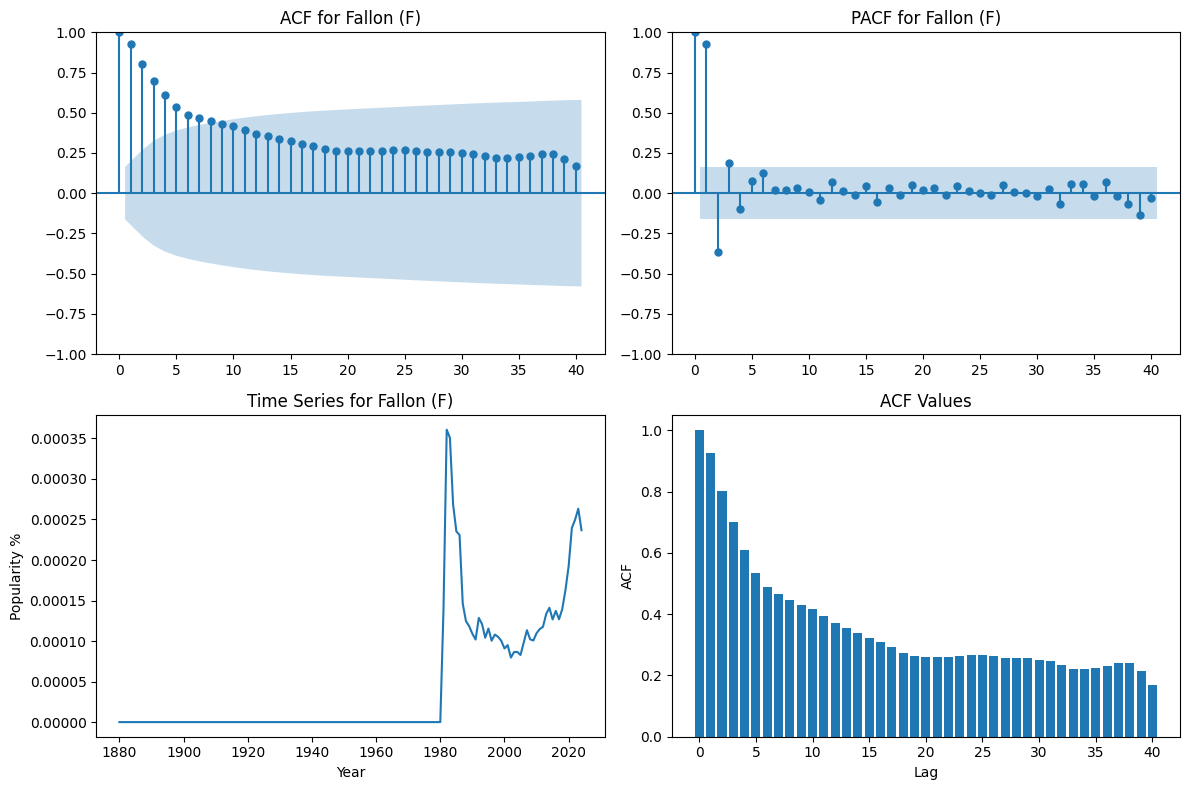

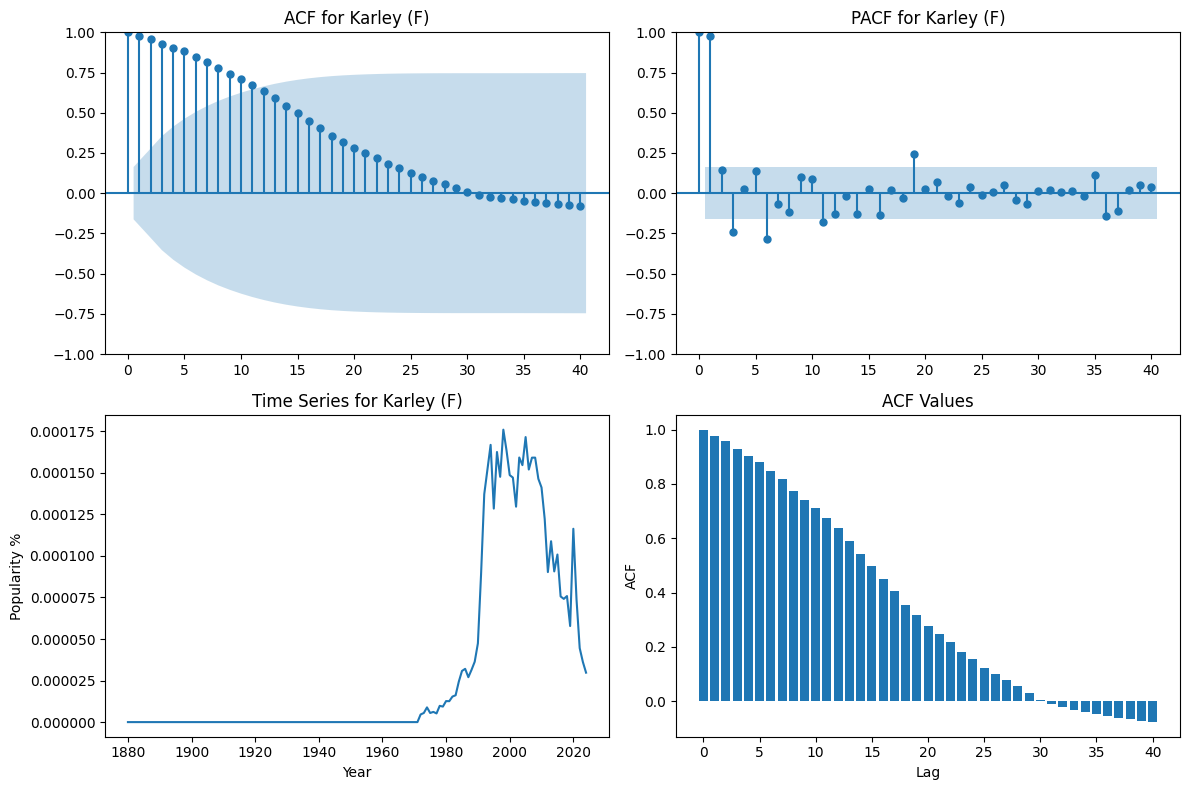

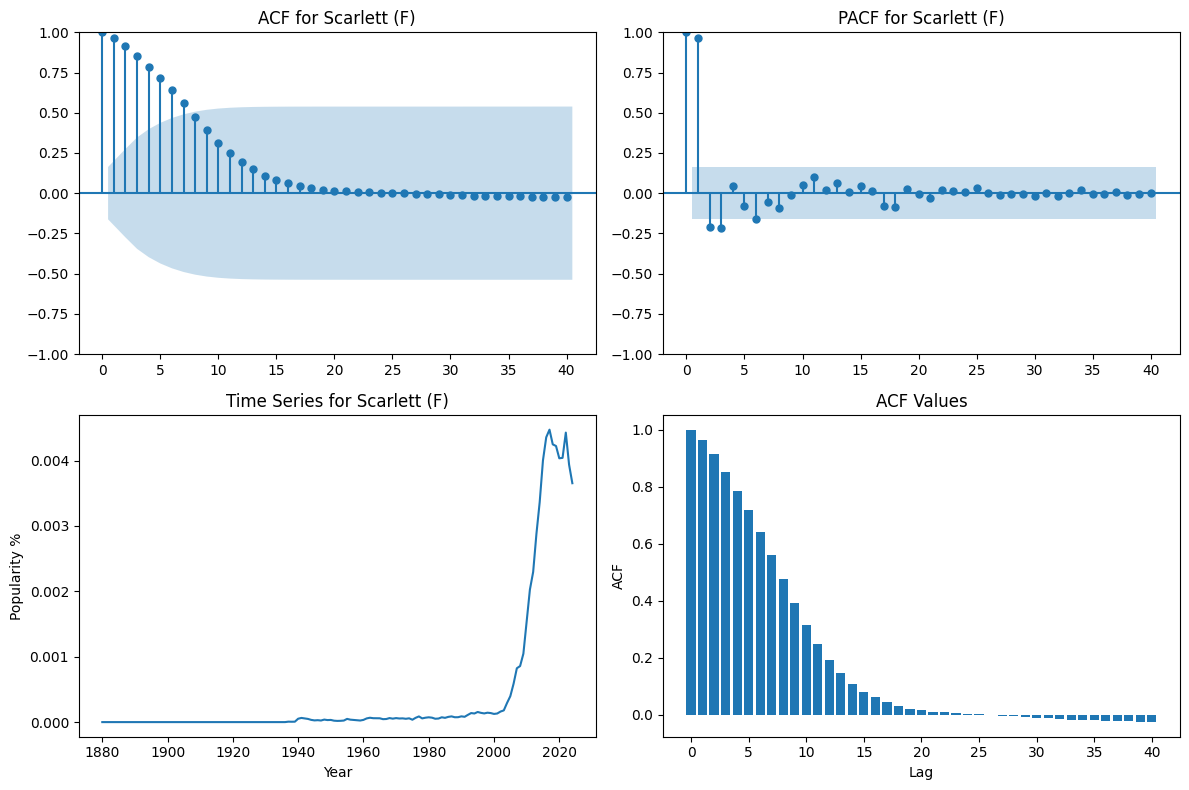

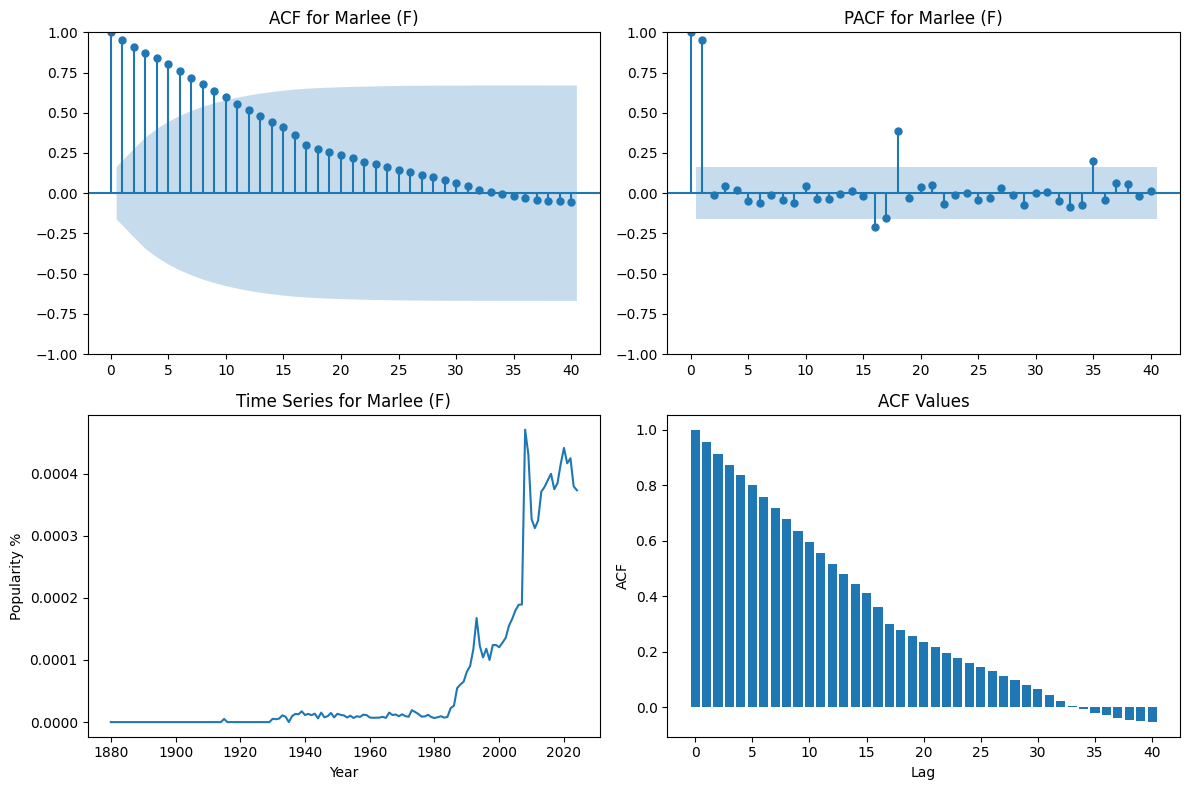

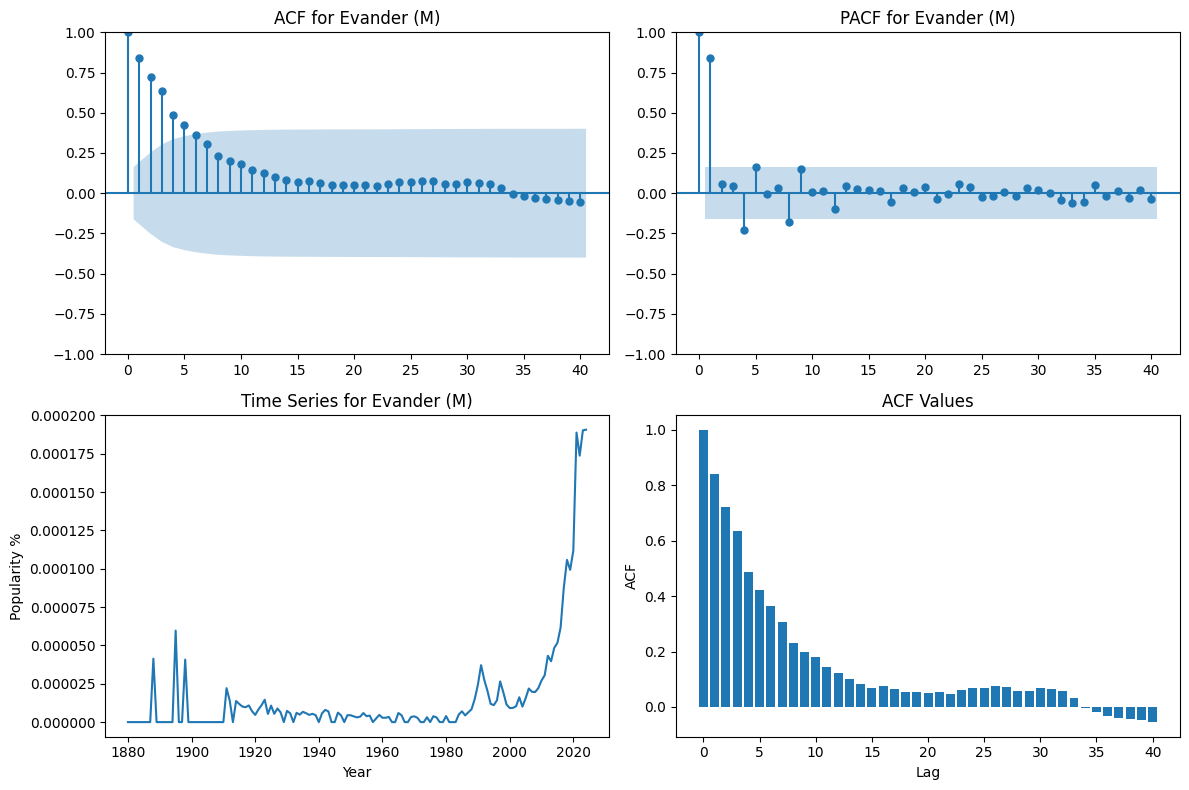

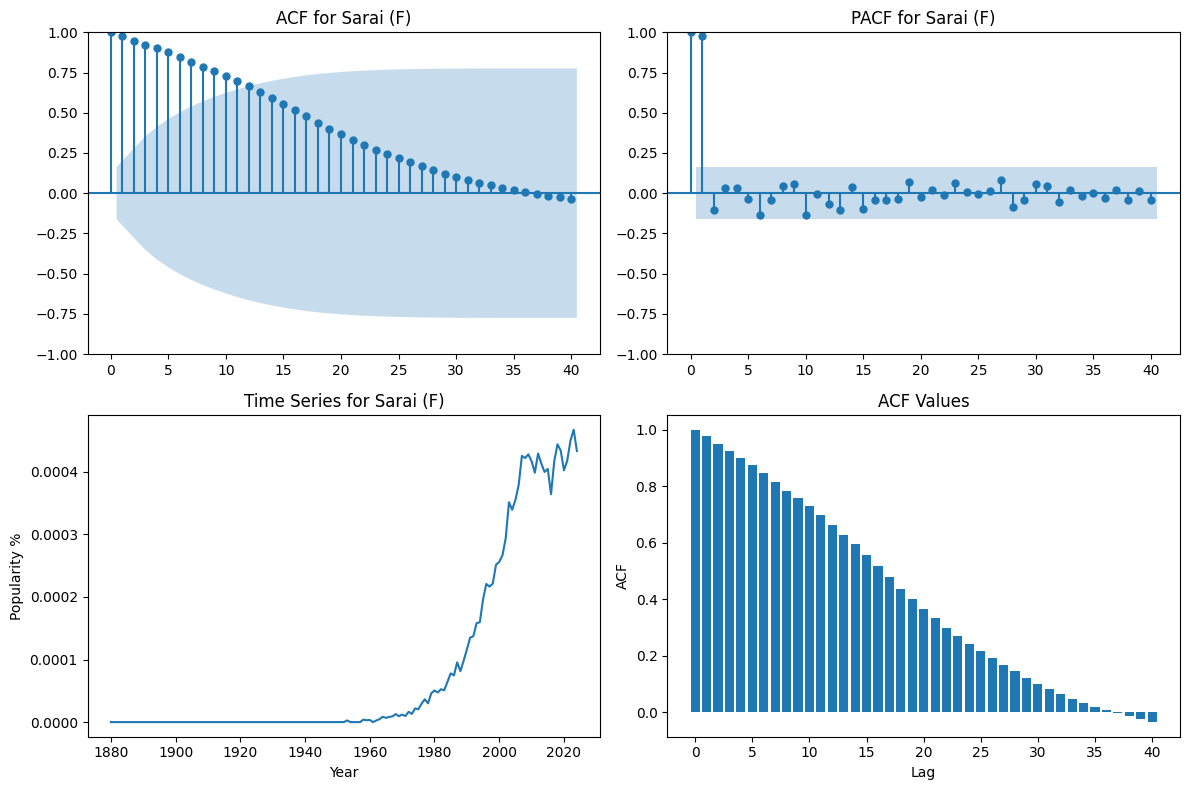

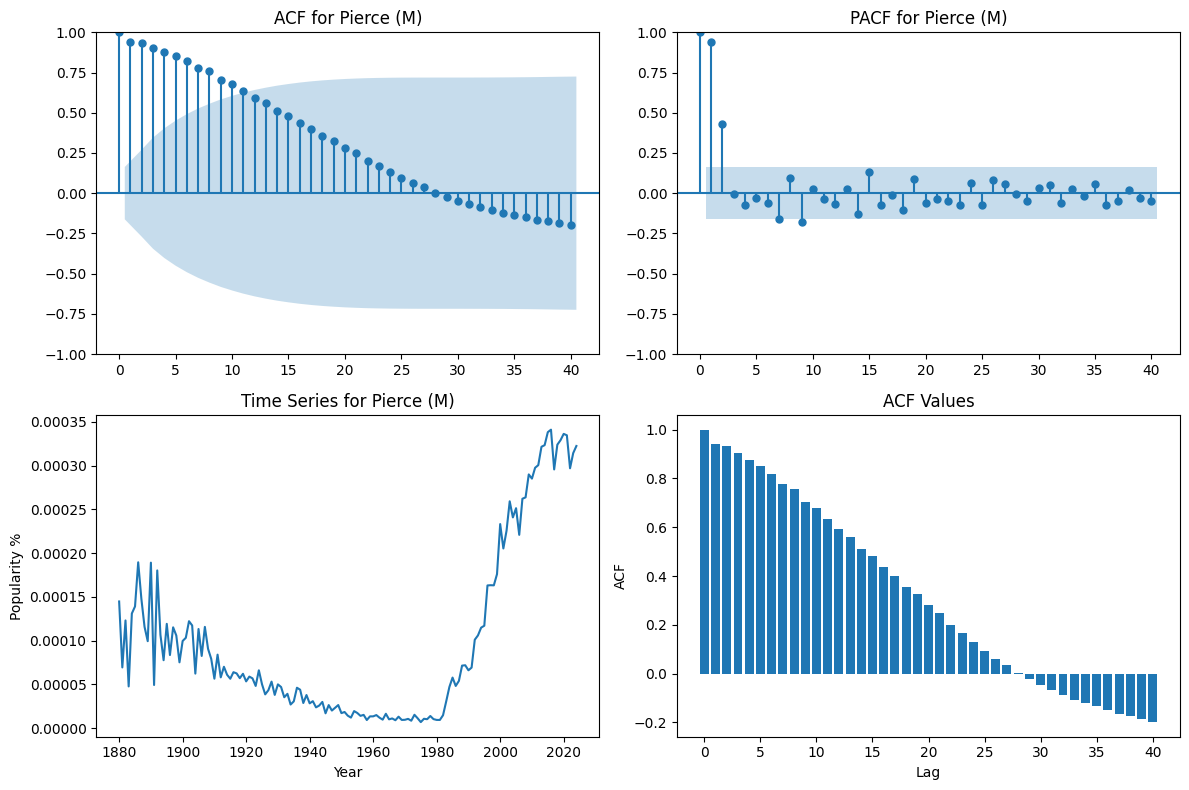

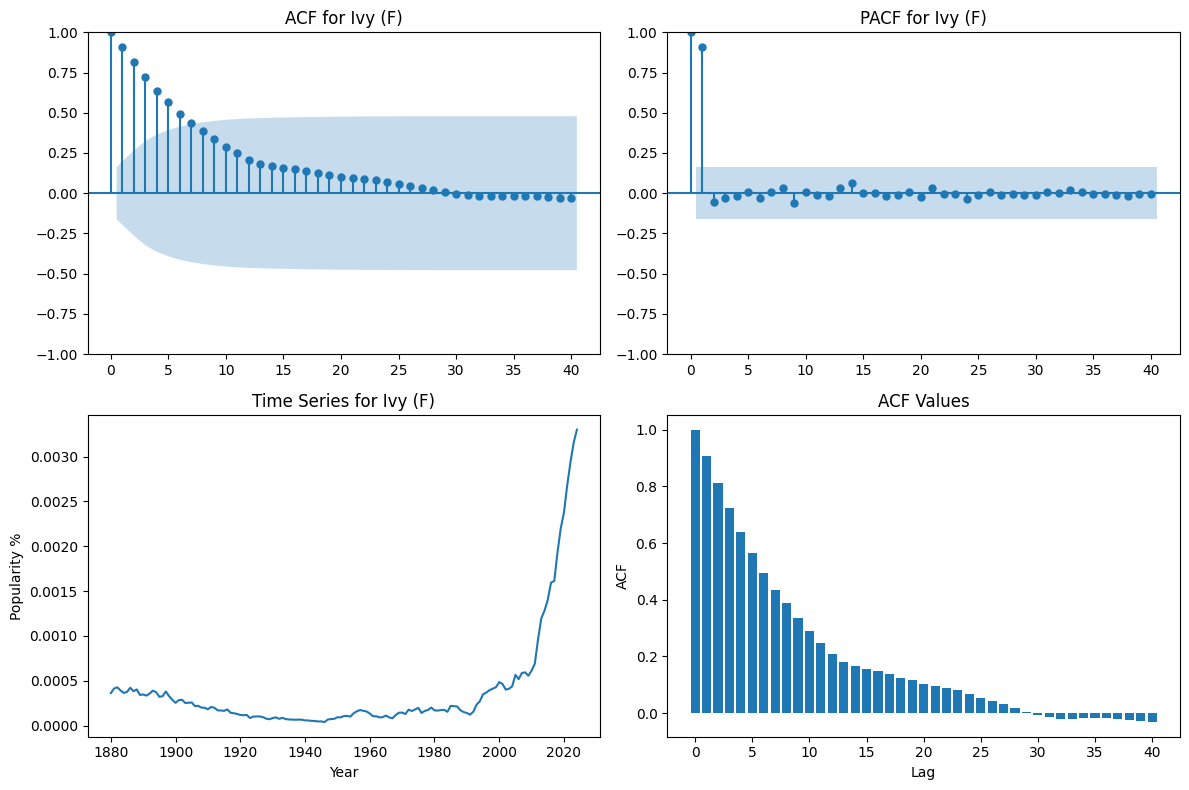

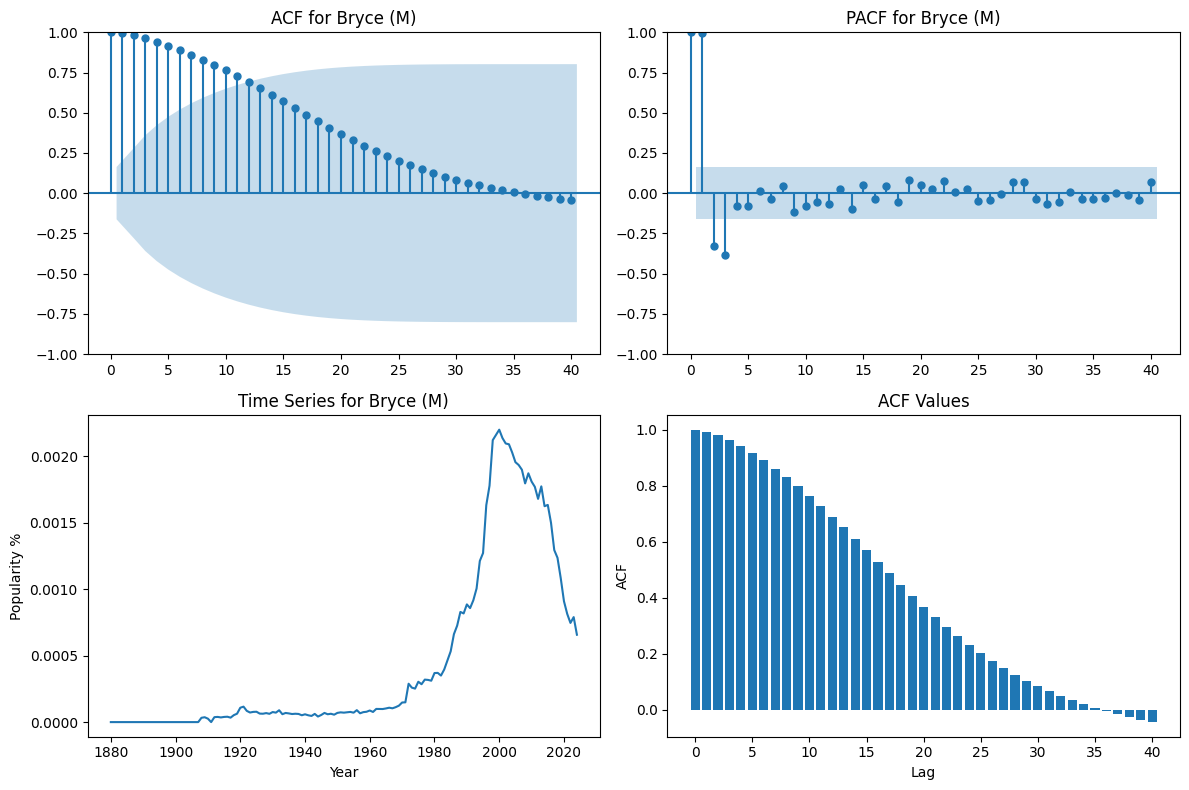

In [7]:
# Pick 20 random names with popularity rank less than 1000 and year greater than 2000
random_names = names.loc[(names['popularity_rank'] < 1000) & (names.index>'2000')]
random_names = random_names.sample(n=20, random_state=RANDOM_SEED)

for index, row in random_names.iterrows():
    analyze_name_autocorrelation(row['name'], row['sex'])

Once again, it looks like only the last year is a good predictor of the current year. There appears to be other years that randomly have correlation but it's not convincing that any would be a good predictor of current year popularity. So let's make a new feature for a one year lag.

In [8]:
names['lag_1_popularity'] = names['popularity_percent'].shift(1)
names.head()


name sex  total_count  popularity_percent  popularity_rank  \
year                                                                         
2024-01-01      Liam   M        22164            0.012921                1   
2024-01-01      Noah   M        20337            0.011856                2   
2024-01-01    Oliver   M        15343            0.008945                3   
2024-01-01  Theodore   M        12011            0.007002                4   
2024-01-01     James   M        11793            0.006875                5   

            lag_1_popularity  
year                          
2024-01-01               NaN  
2024-01-01          0.012921  
2024-01-01          0.011856  
2024-01-01          0.008945  
2024-01-01          0.007002

## Seasonality
There isn't any seasonality for this data since it's year over year. The code below is to show how I would go about assessing seasonality if the data permitted it, but once again, this data will not show seasonality.

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def analyze_seasonal_decomposition(name, sex, period=1):
    """
    Perform seasonal decomposition for a specific name and sex.
    
    Parameters:
    - name: The baby name to analyze
    - sex: The sex (M/F) to analyze
    - period: The seasonal period (default 1 for yearly data. Use 12 for monthly data)
    """
    # Filter data for specific name and sex
    name_data = names[(names['name'] == name) & (names['sex'] == sex)].copy()
    name_data = name_data.sort_values('year')
    
    if len(name_data) < 2 * period:  # Need at least 2 periods for decomposition
        print(f"Not enough data for {name} ({sex}). Need at least {2 * period} observations.")
        return None
    
    # For yearly data, we'll use period=1 since there's no seasonal pattern in yearly data
    # But let's try with a small period to see if there are any patterns
    try:
        # Use period=1 for yearly data (no seasonality expected)
        result = seasonal_decompose(name_data['popularity_percent'], model='additive', period=1)
        
        # Plot the decomposition
        fig, axes = plt.subplots(4, 1, figsize=(12, 10))
        
        # Original data
        axes[0].plot(name_data.index, result.observed)
        axes[0].set_title(f'Original Time Series - {name} ({sex})')
        axes[0].set_ylabel('Popularity %')
        
        # Trend
        axes[1].plot(name_data.index, result.trend)
        axes[1].set_title('Trend Component')
        axes[1].set_ylabel('Trend')
        
        # Seasonal
        axes[2].plot(name_data.index, result.seasonal)
        axes[2].set_title('Seasonal Component')
        axes[2].set_ylabel('Seasonal')
        
        # Residual
        axes[3].plot(name_data.index, result.resid)
        axes[3].set_title('Residual Component')
        axes[3].set_ylabel('Residual')
        axes[3].set_xlabel('Year')
        
        plt.tight_layout()
        plt.show()
        
        return result
    except Exception as e:
        print(f"Error decomposing {name} ({sex}): {e}")
        return None



Analyzing Liam (M):


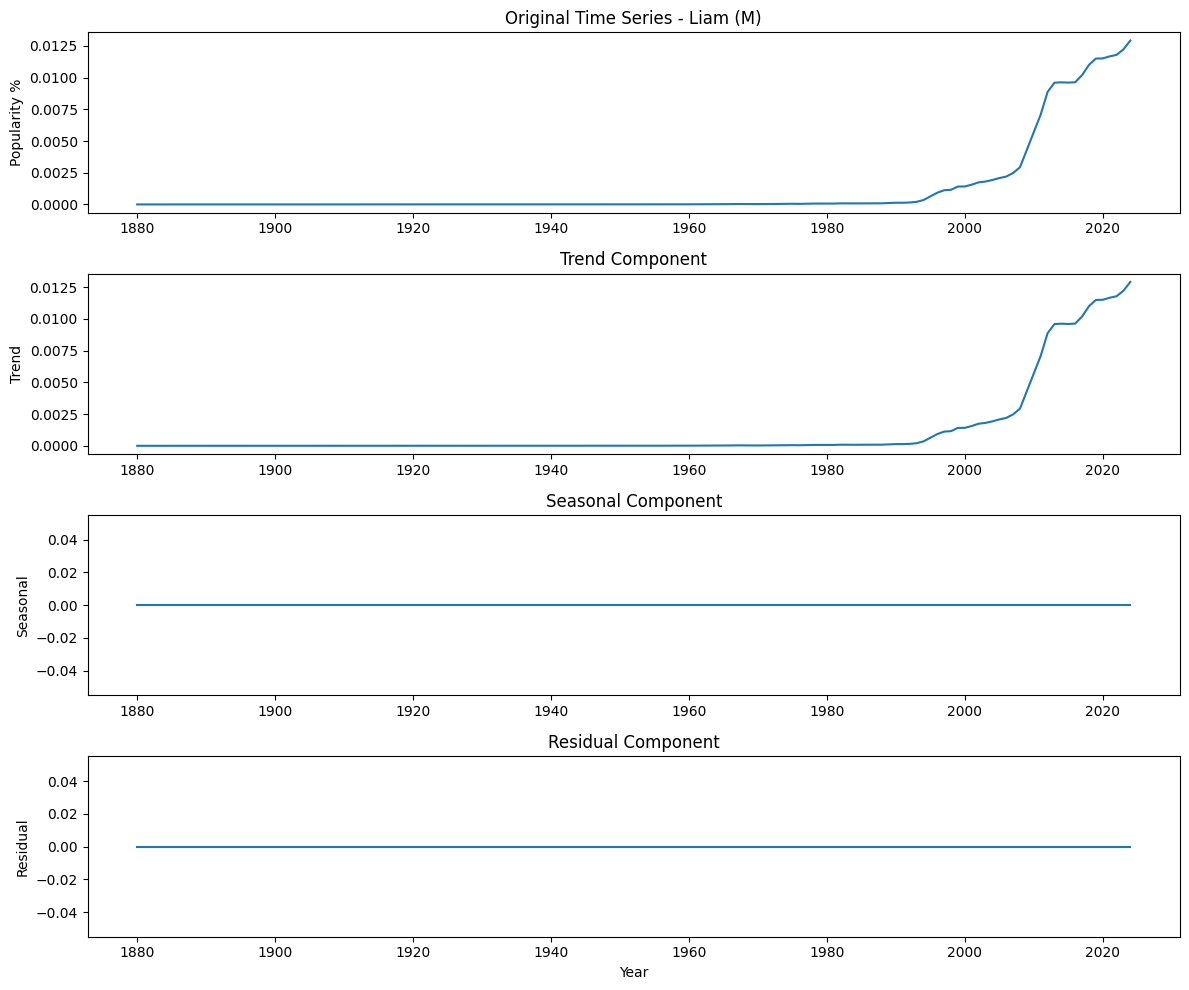

--------------------------------------------------

Analyzing Noah (M):


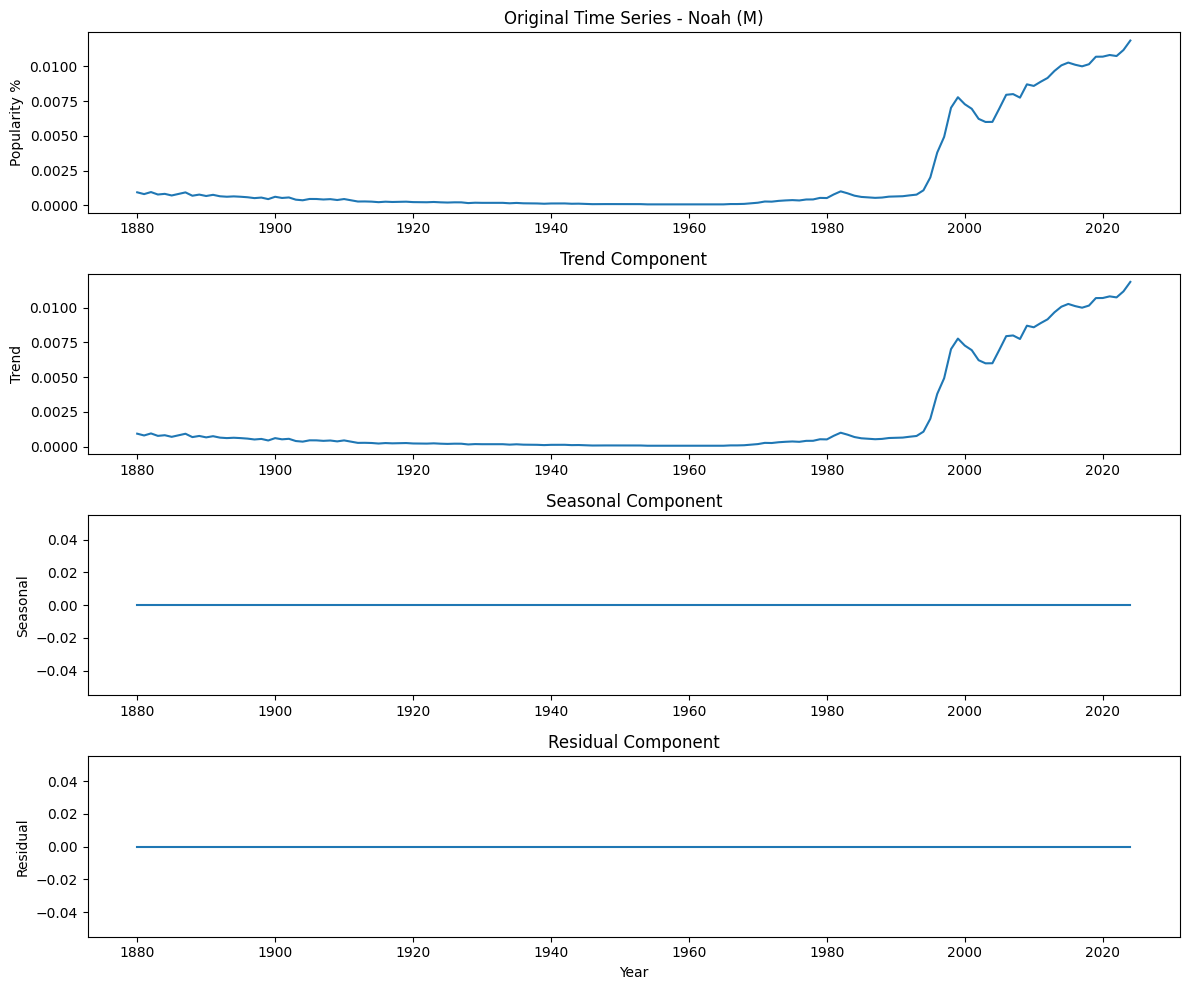

--------------------------------------------------

Analyzing Olivia (F):


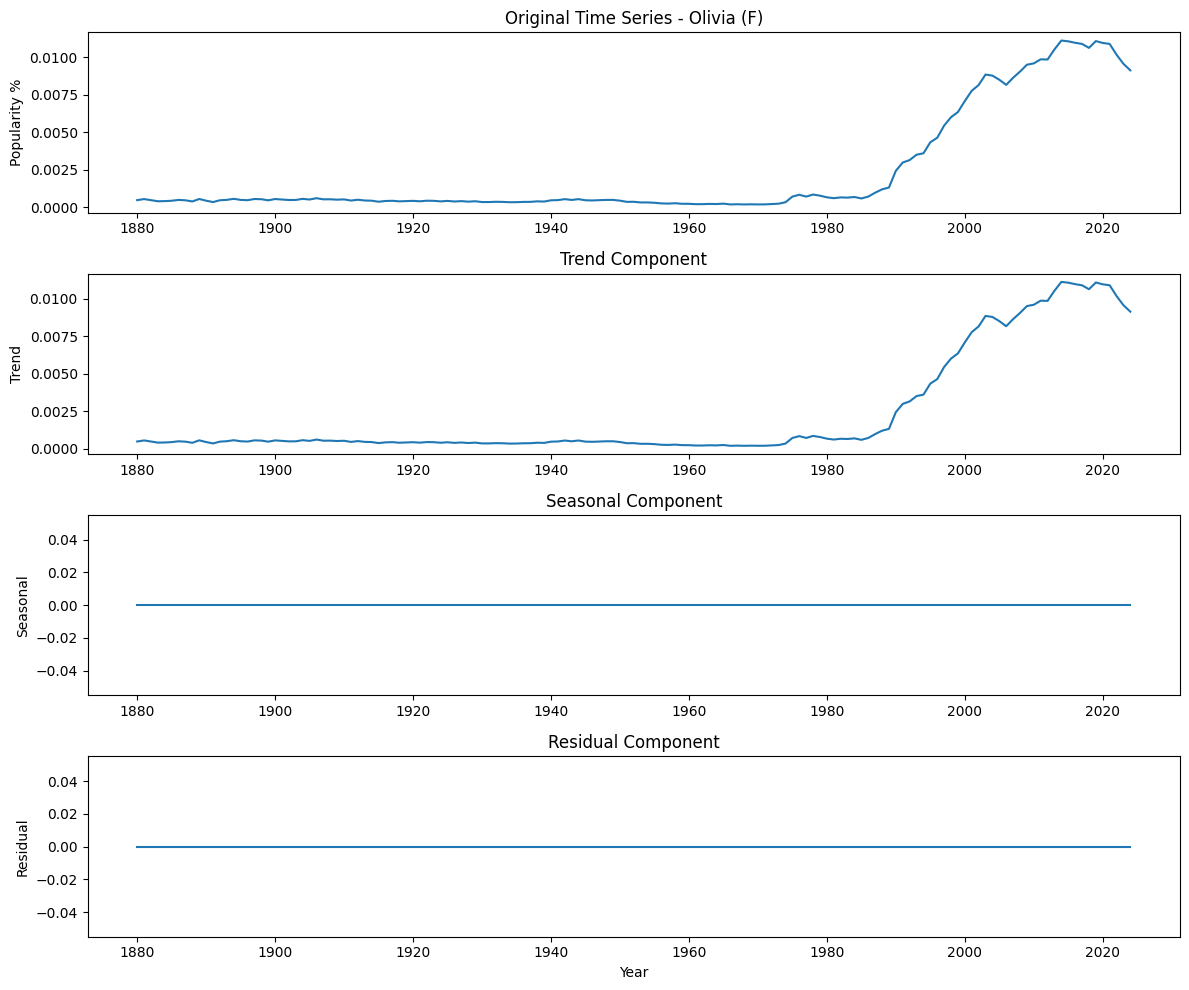

--------------------------------------------------

Analyzing Oliver (M):


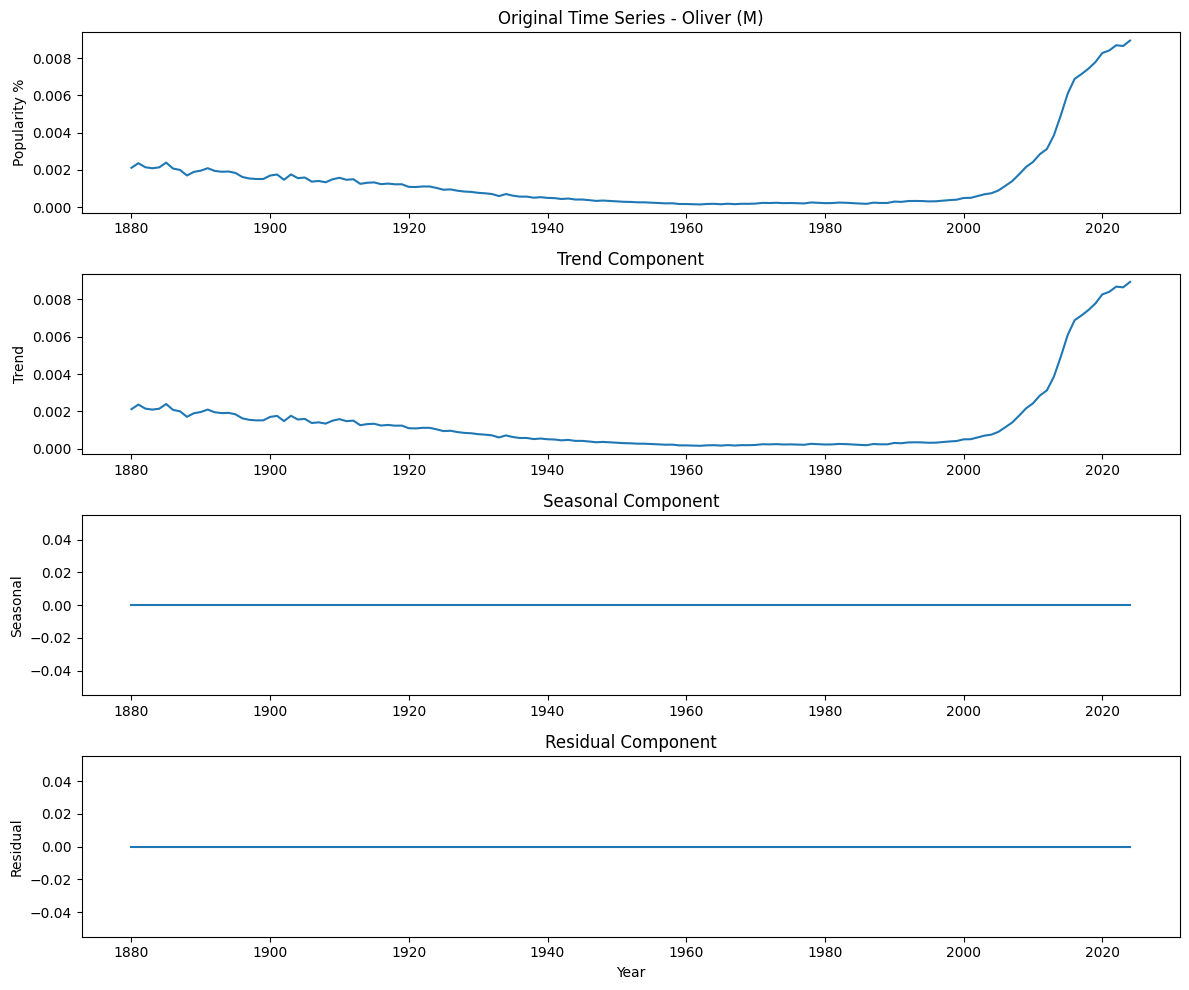

--------------------------------------------------

Analyzing Emma (F):


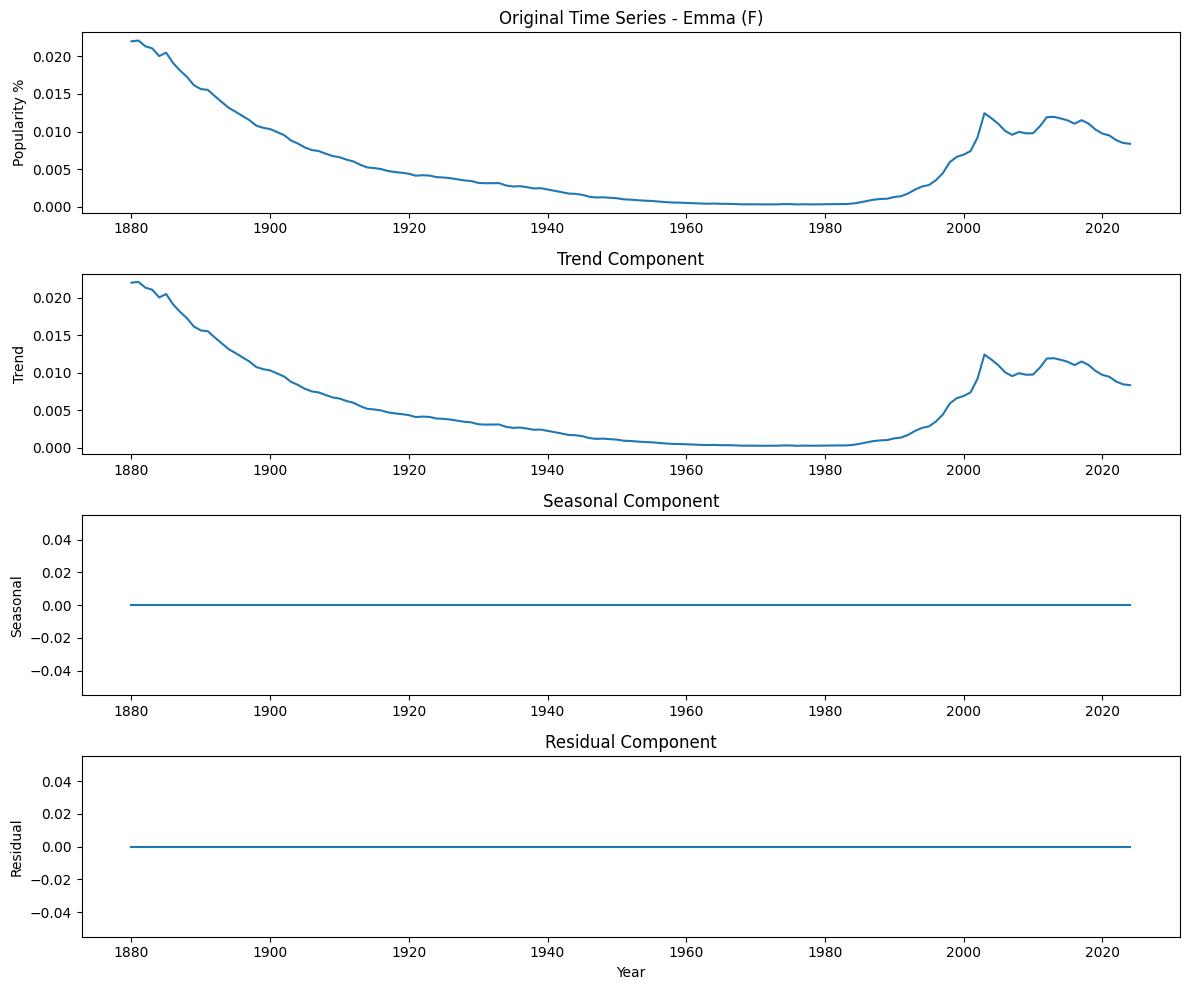

--------------------------------------------------

Analyzing Amelia (F):


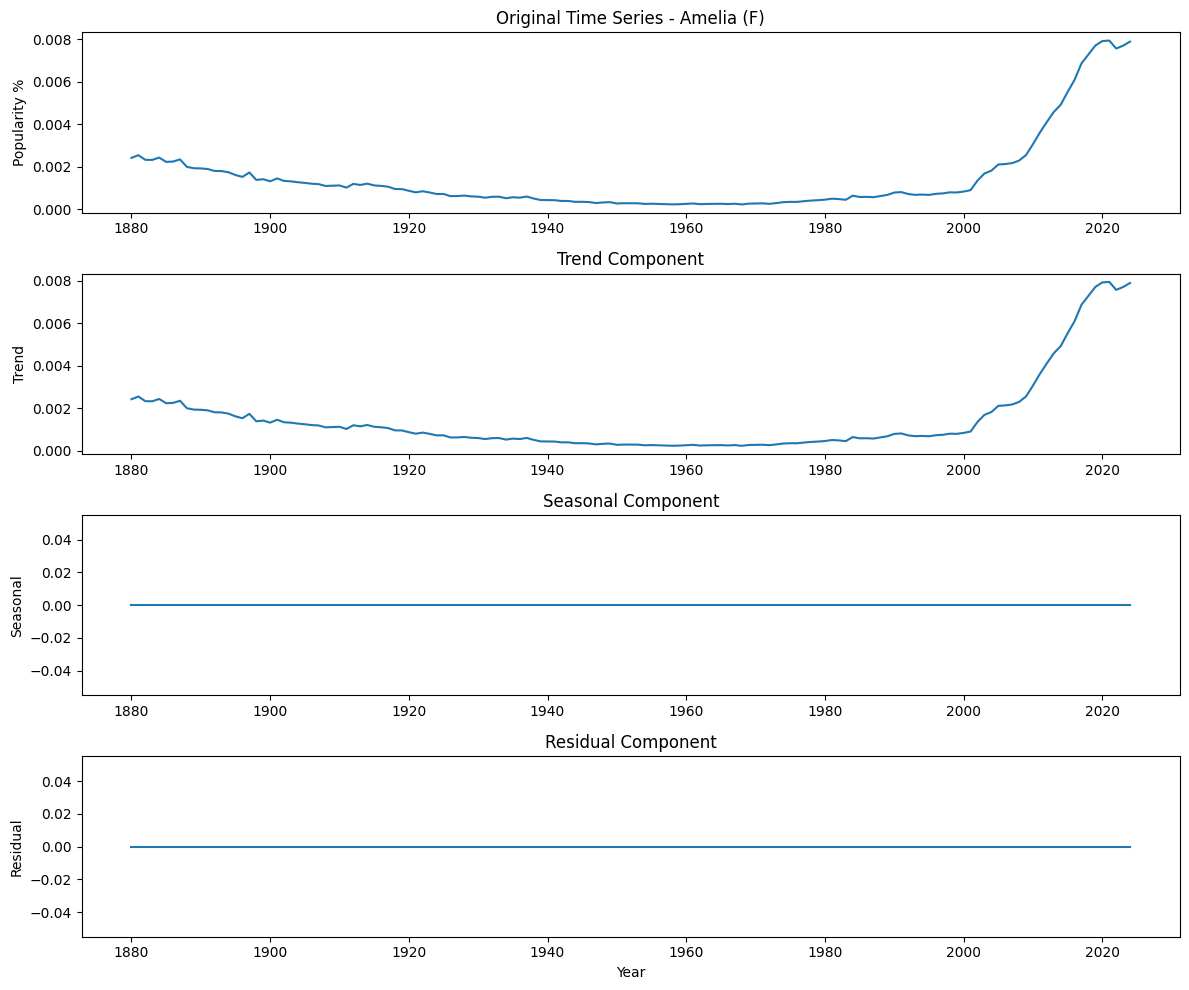

--------------------------------------------------

Analyzing Charlotte (F):


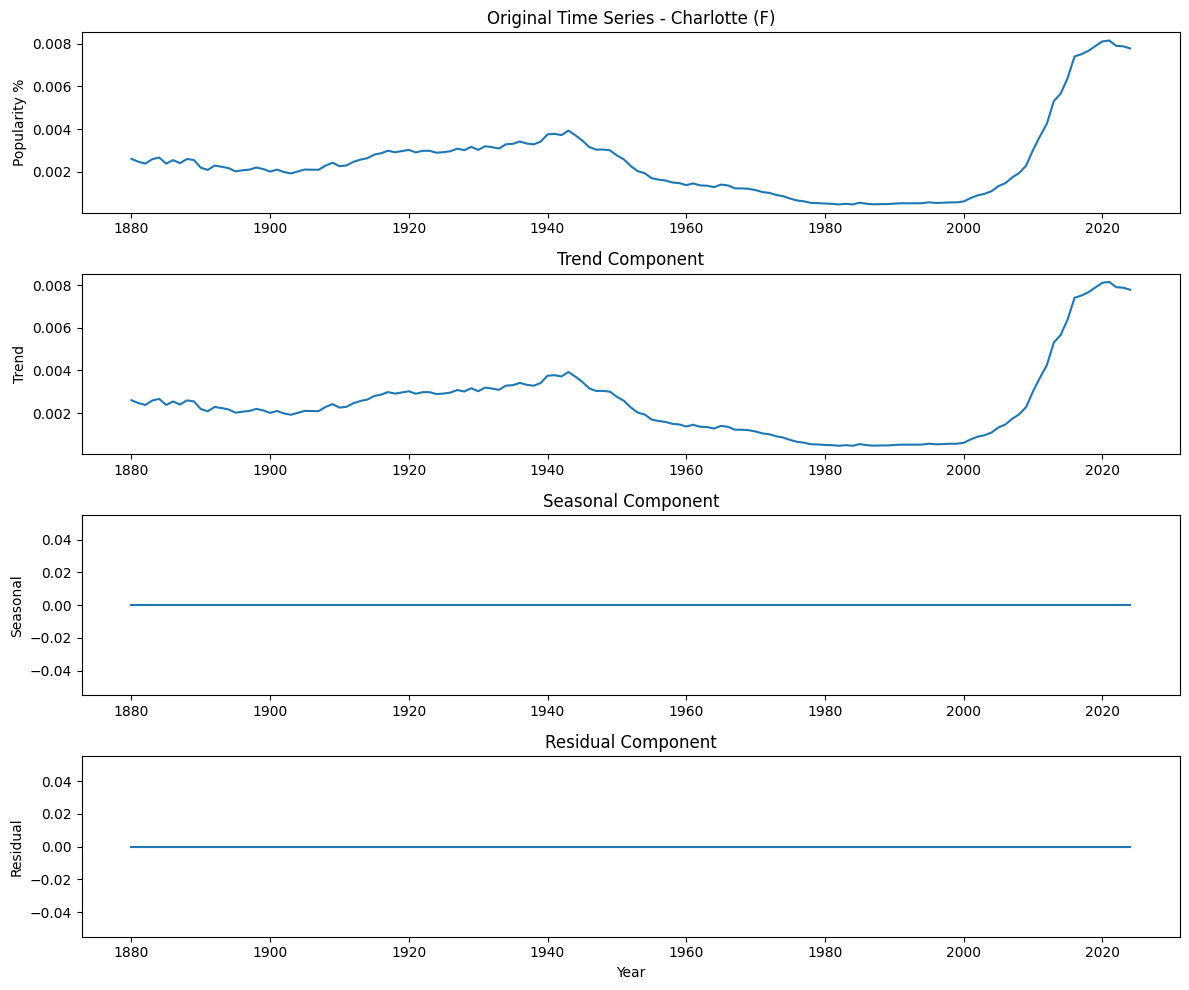

--------------------------------------------------

Analyzing Mia (F):


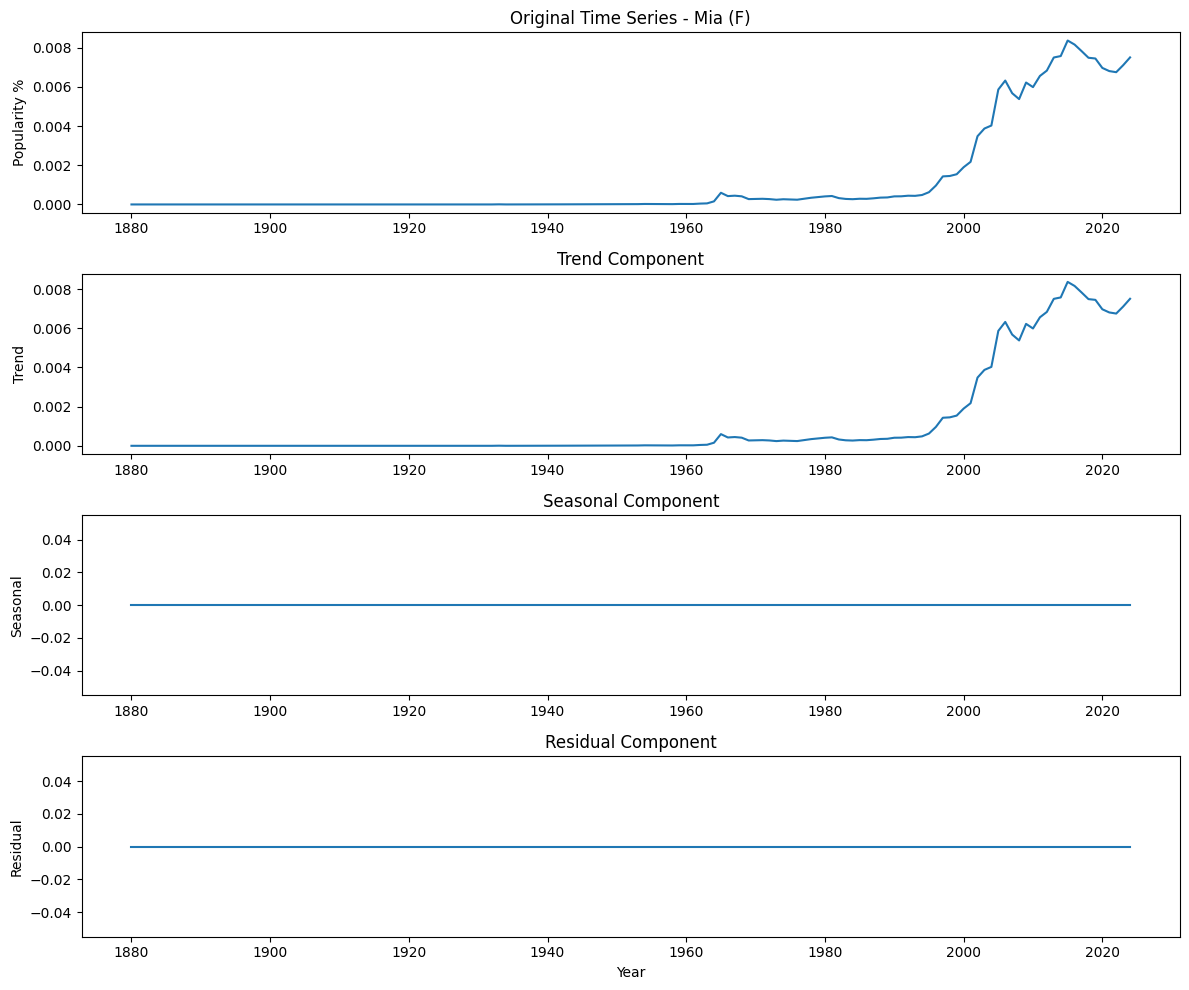

--------------------------------------------------

Analyzing Sophia (F):


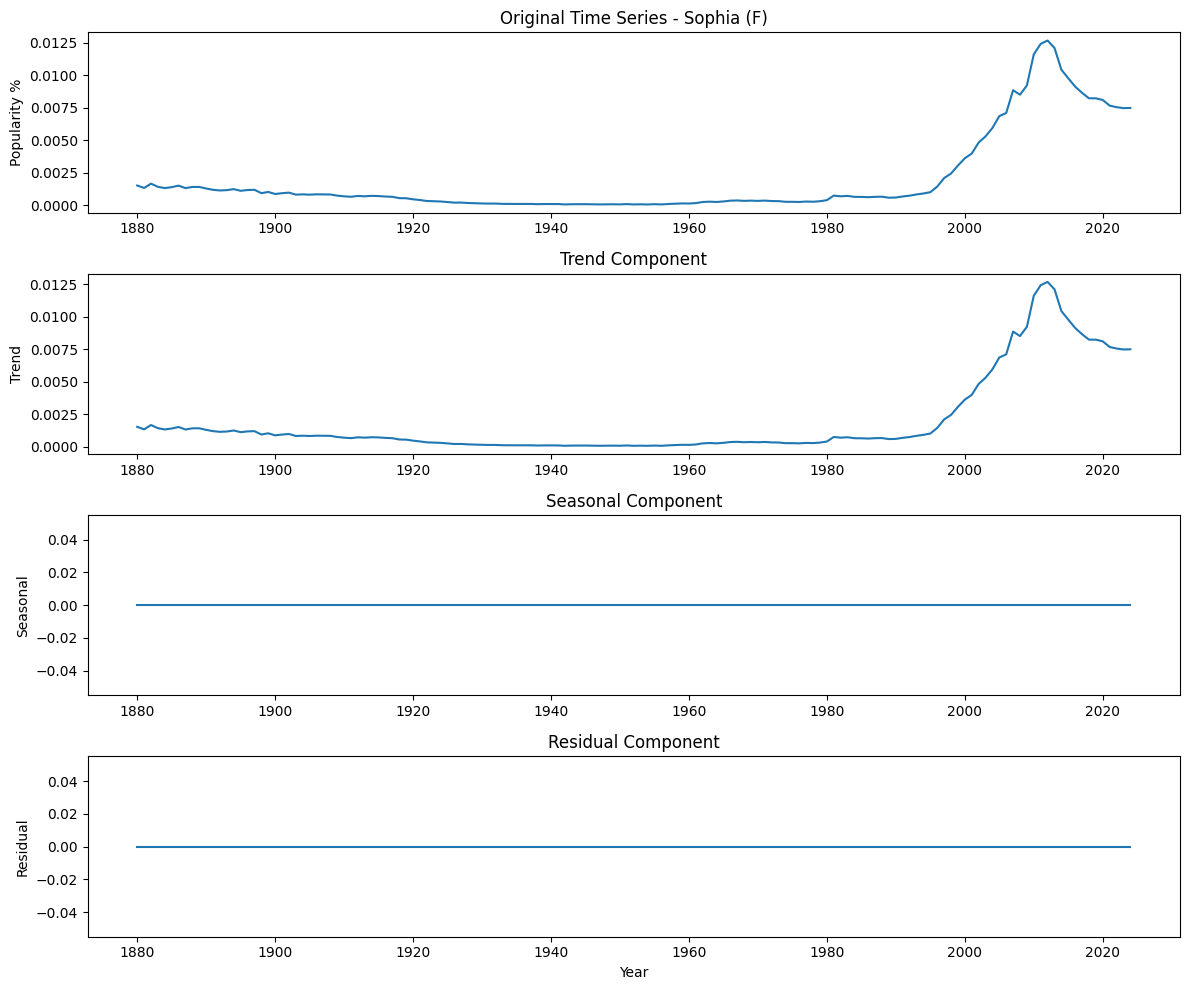

--------------------------------------------------

Analyzing Theodore (M):


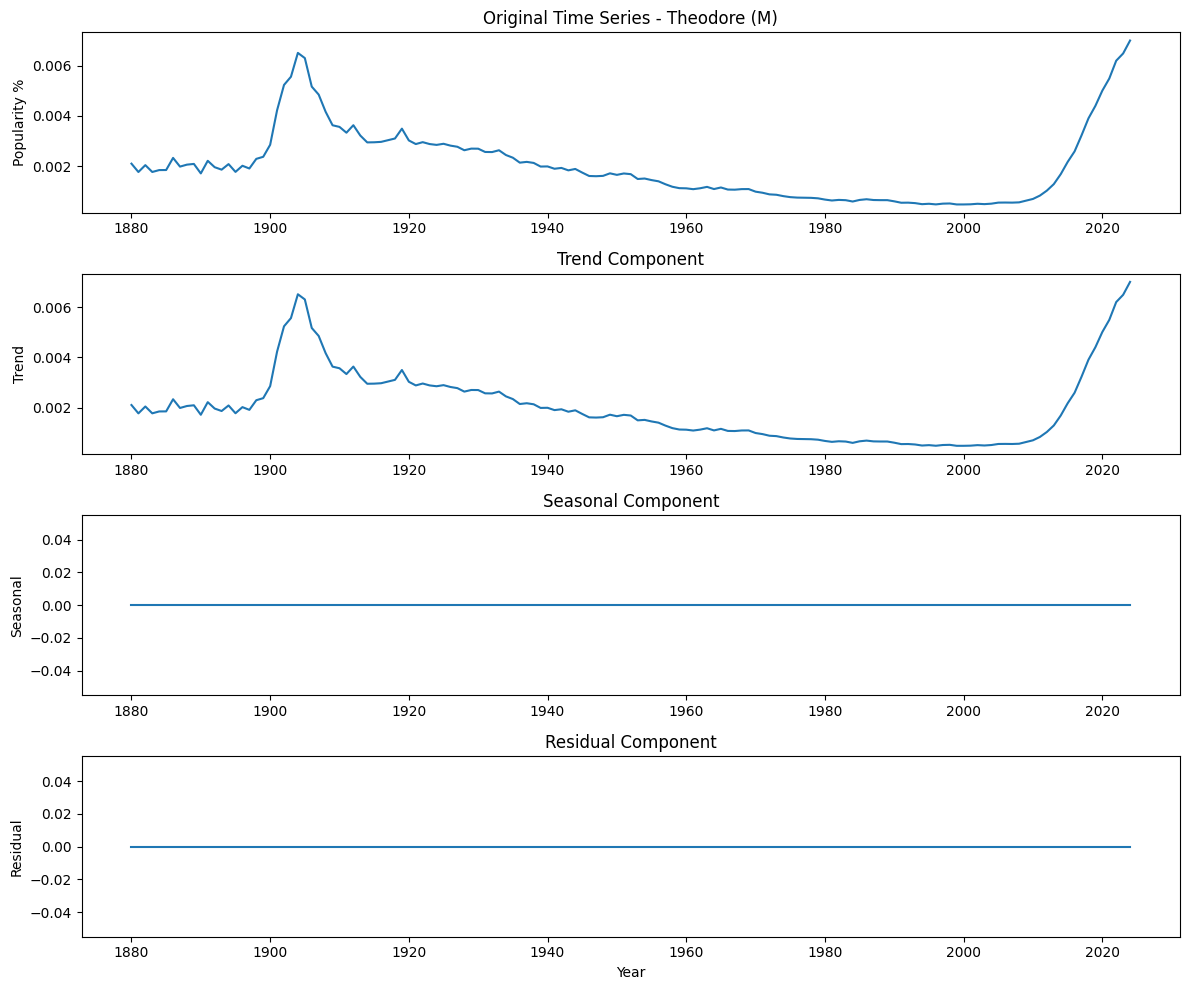

--------------------------------------------------


In [10]:
# Test with top_names
for index, row in top_names.iterrows():
    print(f"\nAnalyzing {row['name']} ({row['sex']}):")
    result = analyze_seasonal_decomposition(row['name'], row['sex'])
    print("-" * 50)


## Rolling Statistics
### Simple moving average

In [11]:
names['rolling_mean_3'] = names['popularity_percent'].rolling(window=3).mean()
names['rolling_mean_5'] = names['popularity_percent'].rolling(window=5).mean()
names['rolling_mean_7'] = names['popularity_percent'].rolling(window=7).mean()
names.head()

name sex  total_count  popularity_percent  popularity_rank  \
year                                                                         
2024-01-01      Liam   M        22164            0.012921                1   
2024-01-01      Noah   M        20337            0.011856                2   
2024-01-01    Oliver   M        15343            0.008945                3   
2024-01-01  Theodore   M        12011            0.007002                4   
2024-01-01     James   M        11793            0.006875                5   

            lag_1_popularity  rolling_mean_3  rolling_mean_5  rolling_mean_7  
year                                                                          
2024-01-01               NaN             NaN             NaN             NaN  
2024-01-01          0.012921             NaN             NaN             NaN  
2024-01-01          0.011856        0.011241             NaN             NaN  
2024-01-01          0.008945        0.009268             NaN             NaN  
2024-01-01          0.007002        0.007607         0.00952             NaN

### Exponential moving average
Since only a one year lag showed correlation to present year data, I expect the exponential moving average to have better predictive power than a simple moving average. An exponential moving average weights recent observations more, while a simple moving average equally weights all observations equally.

In [12]:
names['exp_rolling_mean_3'] = names['popularity_percent'].ewm(span=3, adjust=False).mean()
names['exp_rolling_mean_5'] = names['popularity_percent'].ewm(span=5, adjust=False).mean()
names['exp_rolling_mean_7'] = names['popularity_percent'].ewm(span=7, adjust=False).mean()
names.head()

name sex  total_count  popularity_percent  popularity_rank  \
year                                                                         
2024-01-01      Liam   M        22164            0.012921                1   
2024-01-01      Noah   M        20337            0.011856                2   
2024-01-01    Oliver   M        15343            0.008945                3   
2024-01-01  Theodore   M        12011            0.007002                4   
2024-01-01     James   M        11793            0.006875                5   

            lag_1_popularity  rolling_mean_3  rolling_mean_5  rolling_mean_7  \
year                                                                           
2024-01-01               NaN             NaN             NaN             NaN   
2024-01-01          0.012921             NaN             NaN             NaN   
2024-01-01          0.011856        0.011241             NaN             NaN   
2024-01-01          0.008945        0.009268             NaN             NaN   
2024-01-01          0.007002        0.007607         0.00952             NaN   

            exp_rolling_mean_3  exp_rolling_mean_5  exp_rolling_mean_7  
year                                                                    
2024-01-01            0.012921            0.012921            0.012921  
2024-01-01            0.012389            0.012566            0.012655  
2024-01-01            0.010667            0.011359            0.011727  
2024-01-01            0.008834            0.009907            0.010546  
2024-01-01            0.007855            0.008896            0.009628

Let's plot these rolling averages on the top names

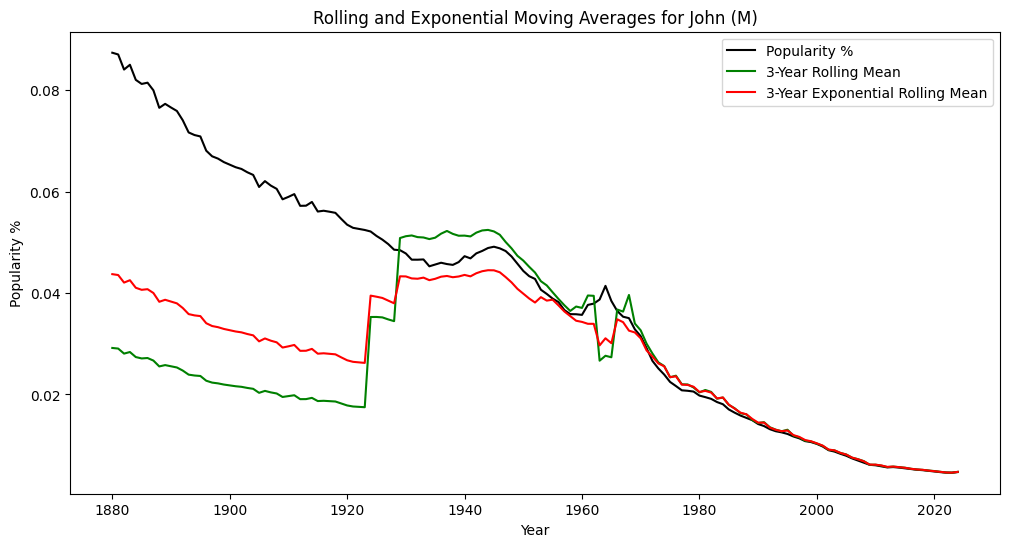

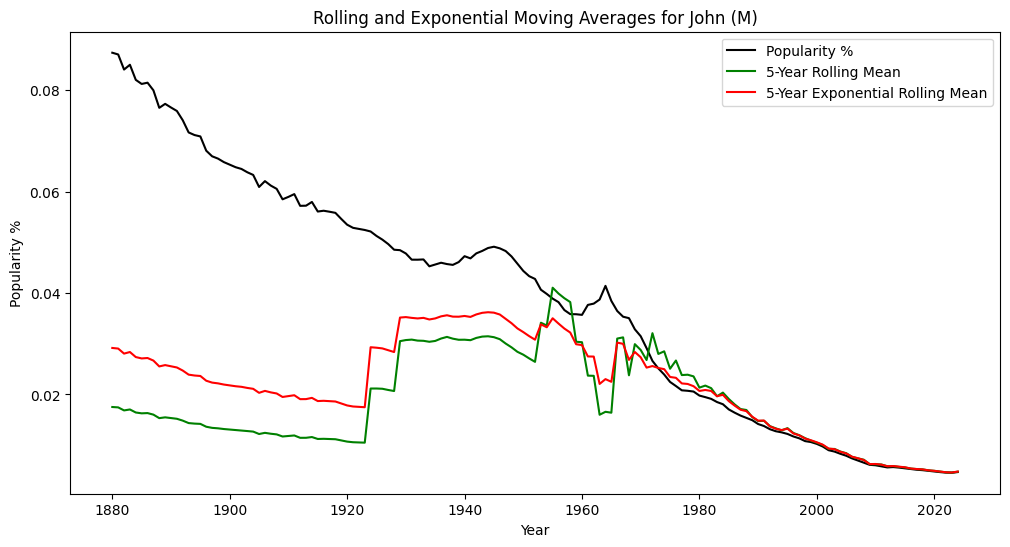

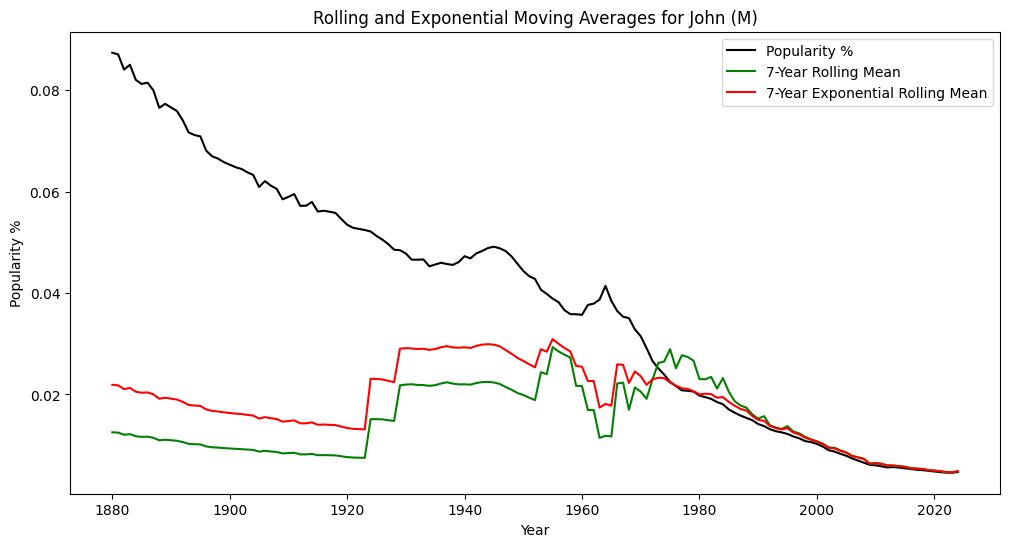

In [13]:
def plot_rolling_averages(name, sex):
    """
    Plot the rolling mean and standard deviation for a specific name and sex.
    
    Parameters:
    - name: The baby name to analyze
    - sex: The sex (M/F) to analyze
    """
    # Filter data for specific name and sex
    name_data = names[(names['name'] == name) & (names['sex'] == sex)].copy()
    name_data = name_data.sort_values('year')

    window_sizes = [3, 5, 7]
    for window in window_sizes:
        plt.figure(figsize=(12, 6))
        
        # Plot original popularity percent
        plt.plot(name_data.index, name_data['popularity_percent'], label='Popularity %', color='black')
        
        # Plot rolling means
        plt.plot(name_data.index, name_data[f'rolling_mean_{window}'], label=f'{window}-Year Rolling Mean', color='green')

        # Plot exponential moving means
        plt.plot(name_data.index, name_data[f'exp_rolling_mean_{window}'], label=f'{window}-Year Exponential Rolling Mean', color='red')

        
        plt.legend()
        plt.title(f'Rolling and Exponential Moving Averages for {name} ({sex})')
        plt.xlabel('Year')
        plt.ylabel('Popularity %')
        plt.show()

plot_rolling_averages('John', 'M')

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

def plot_rolling_averages_combined(name, sex):
    """
    Plot all rolling averages in a single interactive plot.
    """
    # Filter data for specific name and sex
    name_data = names[(names['name'] == name) & (names['sex'] == sex)].copy()
    name_data = name_data.sort_values('year')
    
    fig = go.Figure()
    
    # Original popularity percent
    fig.add_trace(
        go.Scatter(
            x=name_data.index,
            y=name_data['popularity_percent'],
            mode='lines+markers',
            name='Original Popularity %',
            line=dict(color='black', width=3),
            marker=dict(size=6),
            hovertemplate='<b>Year:</b> %{x}<br><b>Popularity:</b> %{y:.2f}%<extra></extra>'
        )
    )
    
    # Colors for different window sizes
    colors = ['green', 'blue', 'red', 'orange', 'purple']
    
    window_sizes = [3, 5, 7]
    for i, window in enumerate(window_sizes):
        color = colors[i % len(colors)]
        
        # Rolling means
        fig.add_trace(
            go.Scatter(
                x=name_data.index,
                y=name_data[f'rolling_mean_{window}'],
                mode='lines',
                name=f'{window}-Year SMA',
                line=dict(color=color, width=2),
                hovertemplate=f'<b>Year:</b> %{{x}}<br><b>{window}-Year SMA:</b> %{{y:.2f}}%<extra></extra>'
            )
        )
        
        # Exponential moving means
        fig.add_trace(
            go.Scatter(
                x=name_data.index,
                y=name_data[f'exp_rolling_mean_{window}'],
                mode='lines',
                name=f'{window}-Year EMA',
                line=dict(color=color, width=2, dash='dash'),
                hovertemplate=f'<b>Year:</b> %{{x}}<br><b>{window}-Year EMA:</b> %{{y:.2f}}%<extra></extra>'
            )
        )
    
    # Update layout
    fig.update_layout(
        title=f'Rolling and Exponential Moving Averages for {name} ({sex})',
        xaxis_title='Year',
        yaxis_title='Popularity %',
        height=600,
        width=1000,
        hovermode='x unified',
        legend=dict(
            orientation="v",
            yanchor="top",
            y=1,
            xanchor="left",
            x=1.02
        ),
        template='plotly_white'
    )
    
    # Add range selector
    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=10, label="10Y", step="year", stepmode="backward"),
                    dict(count=20, label="20Y", step="year", stepmode="backward"),
                    dict(count=50, label="50Y", step="year", stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(visible=True),
            type="date"
        )
    )
    
    fig.show()

plot_rolling_averages_combined('John', 'M')

In [15]:
for index, row in top_names.iterrows():
    plot_rolling_averages_combined(row['name'], row['sex'])


## One-Hot Encode Sex

In [16]:
# One-hot encode sex
names = pd.get_dummies(names, columns=['sex'], drop_first=True)
names.head()


name  total_count  popularity_percent  popularity_rank  \
year                                                                     
2024-01-01      Liam        22164            0.012921                1   
2024-01-01      Noah        20337            0.011856                2   
2024-01-01    Oliver        15343            0.008945                3   
2024-01-01  Theodore        12011            0.007002                4   
2024-01-01     James        11793            0.006875                5   

            lag_1_popularity  rolling_mean_3  rolling_mean_5  rolling_mean_7  \
year                                                                           
2024-01-01               NaN             NaN             NaN             NaN   
2024-01-01          0.012921             NaN             NaN             NaN   
2024-01-01          0.011856        0.011241             NaN             NaN   
2024-01-01          0.008945        0.009268             NaN             NaN   
2024-01-01          0.007002        0.007607         0.00952             NaN   

            exp_rolling_mean_3  exp_rolling_mean_5  exp_rolling_mean_7  sex_M  
year                                                                           
2024-01-01            0.012921            0.012921            0.012921   True  
2024-01-01            0.012389            0.012566            0.012655   True  
2024-01-01            0.010667            0.011359            0.011727   True  
2024-01-01            0.008834            0.009907            0.010546   True  
2024-01-01            0.007855            0.008896            0.009628   True

## Vectorize Names
Not sure if this will have any correlation. I'm curious if similar names share similar trends.

In [17]:
# Vectorize names using transformers
from sentence_transformers import SentenceTransformer

unique_names = names.drop_duplicates(subset=['name']).reset_index().loc[:,'name']

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(unique_names, show_progress_bar=True)

d:\Documents\GitHub\baby-names-app\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

Batches: 100%|██████████| 3276/3276 [00:54<00:00, 60.28it/s]


Now that names have been converted into vector space. I'm going to use principle component analysis to reduce dimensionality.

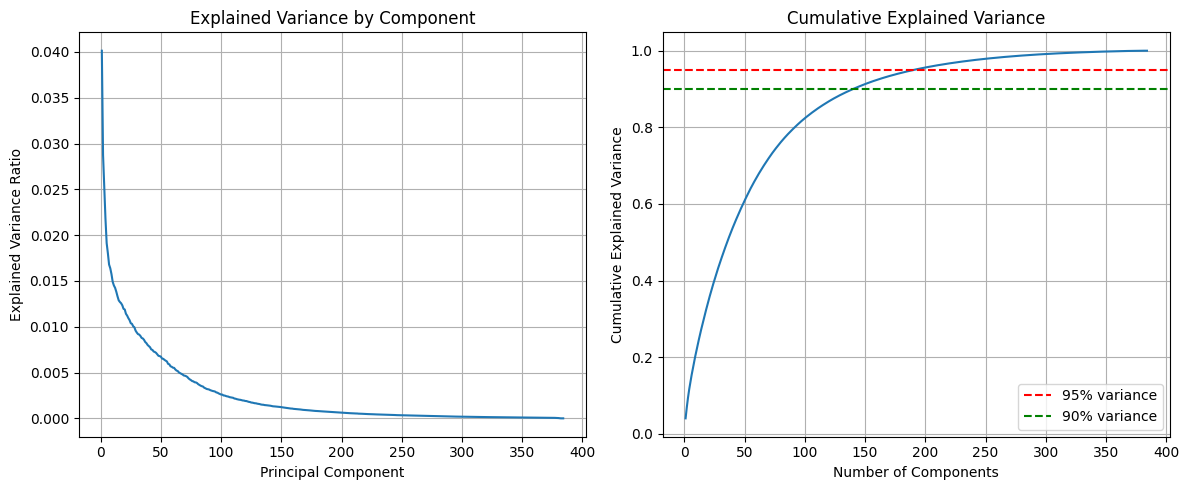

Components needed for 70.0% variance: 66
Components needed for 75.0% variance: 78
Components needed for 80.0% variance: 92
Components needed for 90.0% variance: 140
Components needed for 95.0% variance: 191
Components needed for 99.0% variance: 293


In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Fit PCA with all components first
pca_full = PCA()
pca_full.fit(embeddings)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_variance) + 1), pca_full.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% variance')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Find number of components for different variance thresholds
for threshold in [0.70, 0.75, 0.80, 0.90, 0.95, 0.99]:
    n_components = np.argmax(cumulative_variance >= threshold) + 1
    print(f"Components needed for {threshold*100}% variance: {n_components}")

Well, this kind of defeats the purpose of dimensionality reduction. Looks like 191 components would be needed to explain 95% of the variance. I'm not going to add 191 columns to our data frame. Let's look at a correlation matrix without taking name into consideration.

## Correlation Matrix
Time to see what features correlate with each other

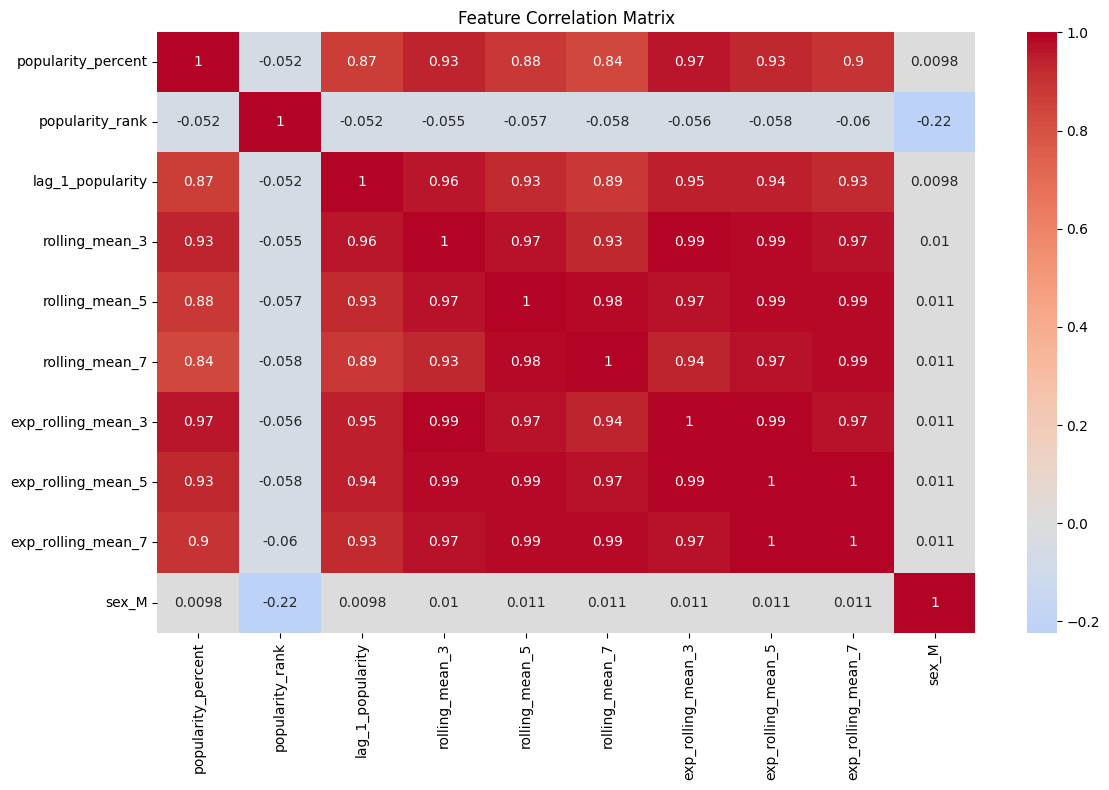

In [19]:
import seaborn as sns

# create correlation matrix
correlation_matrix = names.drop(['name','total_count'], axis=1).corr()
correlation_matrix
# plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


Looks like the rolling means and lag 1 variables will be decent predictors. Let's move one to some model building.

# Model Exploration

In [20]:
names_final = names.drop(['name','total_count','popularity_rank','sex_M'], axis=1).copy()
names_final.head()

popularity_percent  lag_1_popularity  rolling_mean_3  \
year                                                               
2024-01-01            0.012921               NaN             NaN   
2024-01-01            0.011856          0.012921             NaN   
2024-01-01            0.008945          0.011856        0.011241   
2024-01-01            0.007002          0.008945        0.009268   
2024-01-01            0.006875          0.007002        0.007607   

            rolling_mean_5  rolling_mean_7  exp_rolling_mean_3  \
year                                                             
2024-01-01             NaN             NaN            0.012921   
2024-01-01             NaN             NaN            0.012389   
2024-01-01             NaN             NaN            0.010667   
2024-01-01             NaN             NaN            0.008834   
2024-01-01         0.00952             NaN            0.007855   

            exp_rolling_mean_5  exp_rolling_mean_7  
year                                                
2024-01-01            0.012921            0.012921  
2024-01-01            0.012566            0.012655  
2024-01-01            0.011359            0.011727  
2024-01-01            0.009907            0.010546  
2024-01-01            0.008896            0.009628

## Autoregressive Integrated Moving Average (ARIMA)

In [30]:
test_size = 5
test_years = years[:test_size]
train_years = years[test_size:]
test_years

DatetimeIndex(['2024-01-01', '2023-01-01', '2022-01-01', '2021-01-01',
               '2020-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)

In [36]:
names_final

popularity_percent  lag_1_popularity  rolling_mean_3  \
year                                                               
2024-01-01            0.012921               NaN             NaN   
2024-01-01            0.011856          0.012921             NaN   
2024-01-01            0.008945          0.011856        0.011241   
2024-01-01            0.007002          0.008945        0.009268   
2024-01-01            0.006875          0.007002        0.007607   
...                        ...               ...             ...   
1885-01-01            0.000000          0.000000        0.000000   
1884-01-01            0.000000          0.000000        0.000000   
1883-01-01            0.000000          0.000000        0.000000   
1882-01-01            0.000000          0.000000        0.000000   
1881-01-01            0.000000          0.000000        0.000000   

            rolling_mean_5  rolling_mean_7  exp_rolling_mean_3  \
year                                                             
2024-01-01             NaN             NaN            0.012921   
2024-01-01             NaN             NaN            0.012389   
2024-01-01             NaN             NaN            0.010667   
2024-01-01             NaN             NaN            0.008834   
2024-01-01         0.00952             NaN            0.007855   
...                    ...             ...                 ...   
1885-01-01         0.00000             0.0            0.000000   
1884-01-01         0.00000             0.0            0.000000   
1883-01-01         0.00000             0.0            0.000000   
1882-01-01         0.00000             0.0            0.000000   
1881-01-01         0.00000             0.0            0.000000   

            exp_rolling_mean_5  exp_rolling_mean_7  
year                                                
2024-01-01        1.292126e-02        1.292126e-02  
2024-01-01        1.256622e-02        1.265498e-02  
2024-01-01        1.135905e-02        1.172742e-02  
2024-01-01        9.906776e-03        1.054612e-02  
2024-01-01        8.896228e-03        9.628370e-03  
...                        ...                 ...  
1885-01-01       4.940656e-324       9.881313e-324  
1884-01-01       4.940656e-324       9.881313e-324  
1883-01-01       4.940656e-324       9.881313e-324  
1882-01-01       4.940656e-324       9.881313e-324  
1881-01-01       4.940656e-324       9.881313e-324  

[16899750 rows x 8 columns]

In [51]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np

def auto_arima_manual(data, max_p=5, max_d=2, max_q=5):
    """
    Manual implementation of auto-ARIMA
    """
    best_aic = float('inf')
    best_order = None
    best_model = None
    
    # Test different combinations
    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(data, order=(p, d, q))
                    fitted_model = model.fit()
                    aic = fitted_model.aic
                    
                    if aic < best_aic:
                        best_aic = aic
                        best_order = (p, d, q)
                        best_model = fitted_model
                        
                except:
                    continue
    
    return best_model, best_order, best_aic

Create a function that accepts the following inputs: baby names data set, a single baby name, male or female, number of years for testing (default 5), number of years for forecasting (5 years), and the number of years for historical data (default 10). The function then takes these inputs and 

In [56]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

def prepare_time_series_data(data, name, is_male):
    """
    Prepare time series data for ARIMA modeling
    """
    # Filter and sort data
    name_data = data.loc[data['name'] == name].sort_index()
    
    # Ensure we have a continuous time series
    years = name_data.index.get_level_values('year').unique()
    popularity = name_data['popularity_percent'].values
    
    # Create time series
    ts = pd.Series(popularity, index=years)
    
    # Handle missing values
    ts = ts.fillna(method='ffill').fillna(method='bfill')
    
    return ts

def test_stationarity(ts):
    """
    Test if time series is stationary
    """
    # Augmented Dickey-Fuller test
    adf_result = adfuller(ts.dropna())
    
    print(f"ADF Statistic: {adf_result[0]:.4f}")
    print(f"p-value: {adf_result[1]:.4f}")
    print(f"Critical Values:")
    for key, value in adf_result[4].items():
        print(f"\t{key}: {value:.4f}")
    
    # If p-value < 0.05, series is stationary
    is_stationary = adf_result[1] < 0.05
    print(f"Series is {'stationary' if is_stationary else 'non-stationary'}")
    
    return is_stationary

def find_best_arima_order(ts, max_p=5, max_d=2, max_q=5):
    """
    Find best ARIMA order using AIC and BIC
    """
    best_aic = float('inf')
    best_bic = float('inf')
    best_order_aic = None
    best_order_bic = None
    results = []
    
    # Test different combinations
    for p in range(max_p + 1):
        for d in range(max_d + 1):
            for q in range(max_q + 1):
                try:
                    model = ARIMA(ts, order=(p, d, q))
                    fitted_model = model.fit()
                    
                    aic = fitted_model.aic
                    bic = fitted_model.bic
                    
                    results.append({
                        'order': (p, d, q),
                        'aic': aic,
                        'bic': bic,
                        'model': fitted_model
                    })
                    
                    if aic < best_aic:
                        best_aic = aic
                        best_order_aic = (p, d, q)
                    
                    if bic < best_bic:
                        best_bic = bic
                        best_order_bic = (p, d, q)
                        
                except Exception as e:
                    continue
    
    # Sort by AIC
    results_sorted = sorted(results, key=lambda x: x['aic'])
    
    print("Top 5 models by AIC:")
    for i, result in enumerate(results_sorted[:5]):
        print(f"{i+1}. ARIMA{result['order']}: AIC={result['aic']:.2f}, BIC={result['bic']:.2f}")
    
    return best_order_aic, best_order_bic, results_sorted
def validate_arima_model(ts, order, test_size=5):
    """
    Validate ARIMA model using walk-forward validation
    """
    predictions = []
    actuals = []
    
    # Walk-forward validation
    for i in range(len(ts) - test_size, len(ts)):
        train_data = ts[:i]
        test_value = ts.iloc[i]
        
        try:
            model = ARIMA(train_data, order=order)
            fitted_model = model.fit()
            forecast = fitted_model.forecast(steps=1)
            
            predictions.append(forecast[0])
            actuals.append(test_value)
            
        except:
            continue
    
    # Calculate metrics
    mse = np.mean((np.array(actuals) - np.array(predictions))**2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(np.array(actuals) - np.array(predictions)))
    mape = np.mean(np.abs((np.array(actuals) - np.array(predictions)) / np.array(actuals))) * 100
    
    return {
        'rmse': rmse,
        'mae': mae,
        'mape': mape,
        'predictions': predictions,
        'actuals': actuals
    }

def make_multi_year_predictions(ts, order, years_ahead=5):
    """
    Make multi-year predictions using expanding window
    """
    # Use all available data for training
    model = ARIMA(ts, order=order)
    fitted_model = model.fit()
    
    # Make predictions
    forecast = fitted_model.forecast(steps=years_ahead)
    
    # Get confidence intervals
    forecast_ci = fitted_model.get_forecast(steps=years_ahead).conf_int()
    
    # Create future years
    last_year = ts.index[-1]
    future_years = range(last_year + 1, last_year + years_ahead + 1)
    
    return forecast, forecast_ci, future_years

def ensemble_arima_forecast(ts, years_ahead=5):
    """
    Ensemble multiple ARIMA models for better predictions
    """
    # Define multiple orders to test
    orders = [(1,1,1), (2,1,1), (1,1,2), (0,1,1), (2,1,0)]
    
    forecasts = []
    weights = []
    
    for order in orders:
        try:
            model = ARIMA(ts, order=order)
            fitted_model = model.fit()
            
            # Use AIC as weight (lower AIC = higher weight)
            weight = 1 / np.exp(fitted_model.aic - min([fitted_model.aic for _ in orders]))
            weights.append(weight)
            
            forecast = fitted_model.forecast(steps=years_ahead)
            forecasts.append(forecast)
            
        except:
            continue
    
    # Weighted average of forecasts
    weights = np.array(weights)
    weights = weights / np.sum(weights)  # Normalize weights
    
    ensemble_forecast = np.average(forecasts, axis=0, weights=weights)
    
    return ensemble_forecast, forecasts, weights

def plot_forecast_with_ci(ts, forecast, ci, future_years, name):
    """
    Plot forecast with confidence intervals
    """
    plt.figure(figsize=(12, 6))
    
    # Plot historical data
    plt.plot(ts.index, ts.values, label='Historical', color='blue')
    
    # Plot forecast
    plt.plot(future_years, forecast, label='Forecast', color='red', linestyle='--')
    
    # Plot confidence intervals
    plt.fill_between(future_years, 
                     ci.iloc[:, 0], 
                     ci.iloc[:, 1], 
                     alpha=0.3, 
                     color='red', 
                     label='95% Confidence Interval')
    
    plt.xlabel('Year')
    plt.ylabel('Popularity')
    plt.title(f'Multi-Year Forecast for "{name}"')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


def comprehensive_arima_analysis(name, data, years_ahead=5):
    """
    Comprehensive ARIMA analysis for baby names
    """
    print(f"\n{'='*50}")
    print(f"ARIMA Analysis for: {name}")
    print(f"{'='*50}")
    
    # 1. Prepare data
    ts = prepare_time_series_data(data, name)
    print(f"Data points: {len(ts)}")
    
    # 2. Test stationarity
    is_stationary = test_stationarity(ts)
    
    # 3. Find best model
    best_aic_order, best_bic_order, all_results = find_best_arima_order(ts)
    
    # 4. Validate model
    validation_results = validate_arima_model(ts, best_aic_order)
    print(f"\nValidation Results:")
    print(f"RMSE: {validation_results['rmse']:.6f}")
    print(f"MAPE: {validation_results['mape']:.2f}%")
    
    # 5. Make multi-year predictions
    forecast, ci, future_years = make_multi_year_predictions(ts, best_aic_order, years_ahead)
    
    # 6. Create ensemble forecast
    ensemble_forecast, individual_forecasts, weights = ensemble_arima_forecast(ts, years_ahead)
    
    # 7. Plot results
    plot_forecast_with_ci(ts, ensemble_forecast, ci, future_years, name)
    
    return {
        'best_order': best_aic_order,
        'validation_results': validation_results,
        'forecast': ensemble_forecast,
        'confidence_intervals': ci,
        'future_years': future_years
    }

# Example usage
results = comprehensive_arima_analysis("Wyatt", names, years_ahead=5)


ARIMA Analysis for: Wyatt


KeyboardInterrupt: 

## Gradient Boosting Machines (GBM)

## Long Short-Term Memory (LSTM) Networks